# exploration of tables

## reading data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = os.listdir('./data/')
csv_files = [file for file in files if file.endswith('.csv')]
table_names = [file.split('.')[0] for file in csv_files]
table_names

['assessments',
 'courses',
 'studentAssessment',
 'studentInfo',
 'studentRegistration',
 'studentVle',
 'vle']

In [3]:
# create dict of DataFrames for each table 
dfs = {}

for table_name in table_names:
    dfs[f'{table_name}'] = pd.read_csv(f'./data/{table_name}.csv')

In [4]:
print("SIZE OF TABLES \n")

for table_name, df in dfs.items():
    print(table_name, df.shape)

SIZE OF TABLES 

assessments (206, 6)
courses (22, 3)
studentAssessment (173912, 5)
studentInfo (32593, 12)
studentRegistration (32593, 5)
studentVle (10655280, 6)
vle (6364, 6)


In [5]:
# create dict of DataFrames for each table 
dfs = {}

for table_name in table_names:
    dfs[f'{table_name}'] = pd.read_csv(f'./data/{table_name}.csv')


In [6]:
print("SIZE OF TABLES \n")

for table_name, df in dfs.items():
    print(table_name, df.shape)

SIZE OF TABLES 

assessments (206, 6)
courses (22, 3)
studentAssessment (173912, 5)
studentInfo (32593, 12)
studentRegistration (32593, 5)
studentVle (10655280, 6)
vle (6364, 6)


## courses

code_module – code name of the module, which serves as the identifier.

code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.

length - length of the module-presentation in days.

In [7]:
df_courses = dfs['courses'].copy()
df_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [8]:
# check for duplicates
df_courses.duplicated().sum()


np.int64(0)

In [9]:
# check column types
df_courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [10]:
# split code_presentation into year and start_month
df_courses[['year', 'start_month']] = df_courses['code_presentation'].str.extract(r'(\d{4})([A-Za-z])')
df_courses.loc[df_courses['start_month'] == 'J', 'start_month'] = 'October'
df_courses.loc[df_courses['start_month'] == 'B', 'start_month'] = 'February'
df_courses.head()



,code_module,code_presentation,module_presentation_length,year,start_month
0,AAA,2013J,268,2013,October
1,AAA,2014J,269,2014,October
2,BBB,2013J,268,2013,October
3,BBB,2014J,262,2014,October
4,BBB,2013B,240,2013,February


In [11]:
#check missing data
df_courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
year                          0
start_month                   0
dtype: int64

In [12]:
# take a look at quantitative variables
df_courses.describe()


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Text(0, 0.5, 'Number of courses')

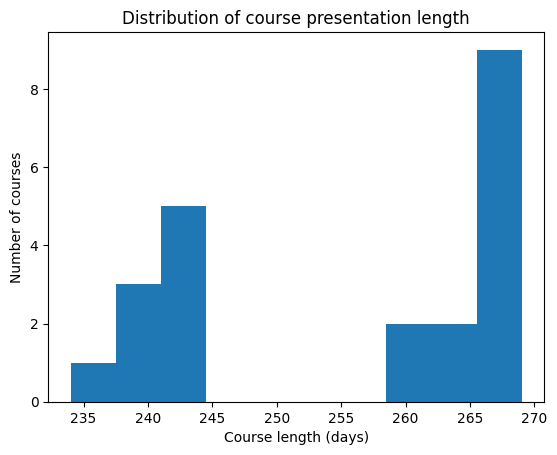

In [13]:
plt.hist(df_courses['module_presentation_length'], bins=None)
plt.title('Distribution of course presentation length')
plt.xlabel('Course length (days)')
plt.ylabel('Number of courses')

There seem to be two groups of course lengths

In [14]:
# take a look at qualitative variables ; note, year is considered categorical here
df_courses.describe(include='object')

,code_module,code_presentation,year,start_month
count,22,22,22,22
unique,7,4,2,2
top,BBB,2014J,2014,October
freq,4,7,13,13


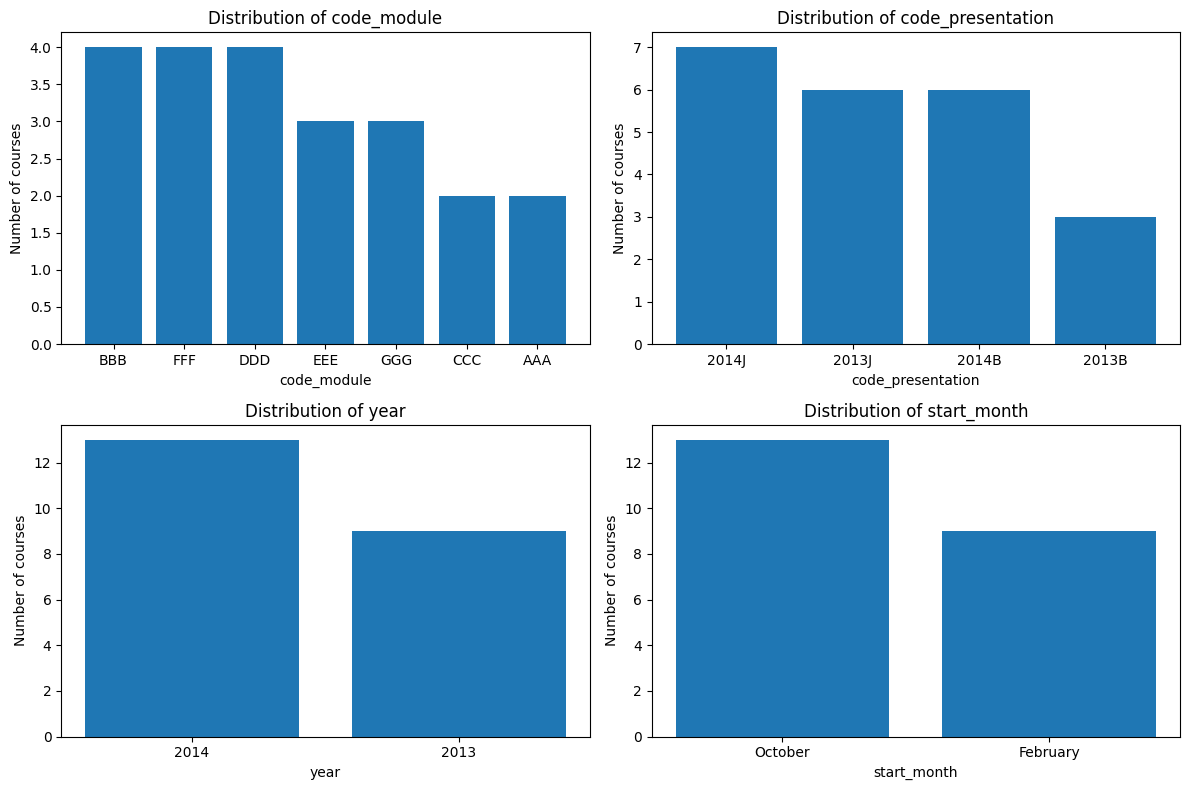

In [15]:
cat_variables = ['code_module', 'code_presentation', 'year', 'start_month']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()


for i, variable in enumerate(cat_variables):
    data = df_courses[f'{variable}'].value_counts()
    ax = axes[i]

    ax.bar(data.index, data)
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(f'{variable}')
    ax.set_ylabel('Number of courses')


plt.tight_layout()


clear relationship between module_presentation_length and start_month

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'AAA'),
  Text(1, 0, 'BBB'),
  Text(2, 0, 'CCC'),
  Text(3, 0, 'DDD'),
  Text(4, 0, 'EEE'),
  Text(5, 0, 'FFF'),
  Text(6, 0, 'GGG')])

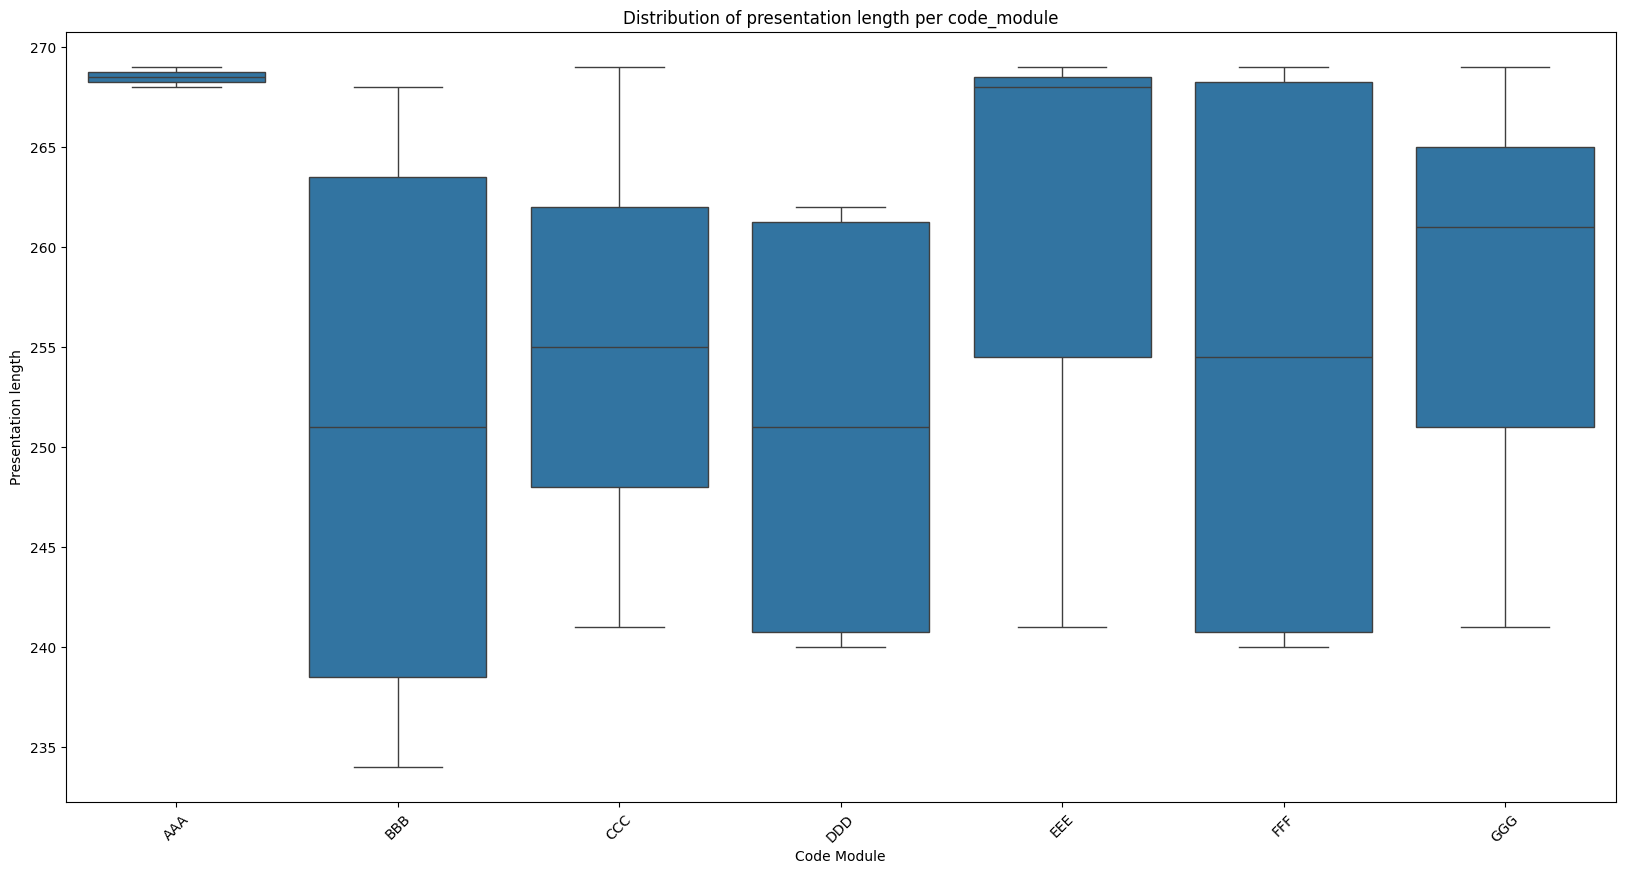

In [16]:
# Create a boxplot for the module_presentation_length of each code_module
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_courses, x='code_module', y='module_presentation_length')
plt.title('Distribution of presentation length per code_module')
plt.xlabel('Code Module')
plt.ylabel('Presentation length')
plt.xticks(rotation=45)

->  Except for AAA, all courses seem to have quite a variable presentation length

In [17]:
# create interactive histogram for the relationship between presentation length and code_module per start_month
import plotly.express as px
from plotly.subplots import make_subplots

# split df per start month
df = df_courses[df_courses['start_month'] == 'february']
df_oct = df_courses[df_courses['start_month'] == 'october']

# define order for uniform color use in legend
category_order = df_courses['code_module'].sort_values().unique()
color_sequence = px.colors.qualitative.Plotly

# create charts for February and October
fig_feb = px.histogram(df, x='module_presentation_length', color='code_module', nbins=30,
                       labels={'module_presentation_length': 'Course length (days)', 'code_module': 'Code Module'},
                       title='Distribution of Course Presentation Length by Code Module (start February)',
                       color_discrete_sequence=color_sequence,
                       category_orders={'code_module': category_order},)


fig_oct = px.histogram(df_oct, x='module_presentation_length', color='code_module', nbins=30,
                       labels={'module_presentation_length': 'Course length (days)', 'code_module': 'Code Module'},
                       title='Distribution of Course Presentation Length by Code Module (start October)',
                       color_discrete_sequence=color_sequence,
                       category_orders={'code_module': category_order})

# create subplot and add figures
fig = make_subplots(rows=2, cols=1, subplot_titles=('Start February', 'Start October'),
                    horizontal_spacing=0.1)

for trace in fig_feb.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_oct.data:
    fig.add_trace(trace, row=2, col=1)

# set fixed x axis limits for easy comparison
xmin = min(df_courses['module_presentation_length'])-2
xmax = max(df_courses['module_presentation_length'])+2
fig.update_xaxes(range=[xmin, xmax], row=1, col=1)
fig.update_xaxes(range=[xmin, xmax], row=2, col=1)

fig.update_layout(
    showlegend=True,
    height=1000
)



->  variability in course length within code_module is explained by start month

## assessments

code_module – identification code of the module, to which the assessment belongs.

code_presentation - identification code of the presentation, to which the assessment belongs.

id_assessment – identification number of the assessment.

assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).

date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).

weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

In [18]:
df_assessments = dfs['assessments'].copy()
df_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [19]:
# check for duplicates
df_assessments.duplicated().sum()


np.int64(0)

In [20]:
# check column types
df_assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [21]:
#check missing data
df_assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [22]:
# check rows with missing data
df_assessments[df_assessments['date'].isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [23]:
# take a look at quantitative variables
df_assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


Text(0, 0.5, 'Number of assessments')

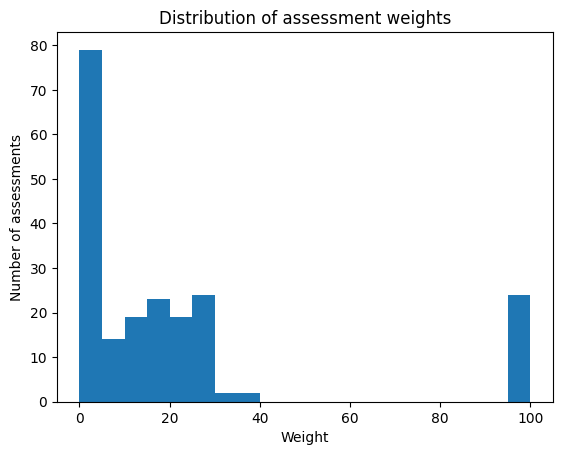

In [24]:
plt.hist(df_assessments['weight'], bins=20)
plt.title('Distribution of assessment weights')
plt.xlabel('Weight')
plt.ylabel('Number of assessments')

In [25]:
# check total of weights for each unique presentation of a module
modules = df_assessments['code_module'].unique()
presentations = df_assessments['code_presentation'].unique()
total_weights = {}

for module in modules:
    for presentation in presentations:
        module_presentation = module + '-' + presentation
        total_weights[module_presentation] = df_assessments[(df_assessments['code_module']==module) & (df_assessments['code_presentation']==presentation)].weight.sum()

total_weights

{'AAA-2013J': np.float64(200.0),
 'AAA-2014J': np.float64(200.0),
 'AAA-2013B': np.float64(0.0),
 'AAA-2014B': np.float64(0.0),
 'BBB-2013J': np.float64(200.0),
 'BBB-2014J': np.float64(200.0),
 'BBB-2013B': np.float64(200.0),
 'BBB-2014B': np.float64(200.0),
 'CCC-2013J': np.float64(0.0),
 'CCC-2014J': np.float64(300.0),
 'CCC-2013B': np.float64(0.0),
 'CCC-2014B': np.float64(300.0),
 'DDD-2013J': np.float64(200.0),
 'DDD-2014J': np.float64(200.0),
 'DDD-2013B': np.float64(200.0),
 'DDD-2014B': np.float64(200.0),
 'EEE-2013J': np.float64(200.0),
 'EEE-2014J': np.float64(200.0),
 'EEE-2013B': np.float64(0.0),
 'EEE-2014B': np.float64(200.0),
 'FFF-2013J': np.float64(200.0),
 'FFF-2014J': np.float64(200.0),
 'FFF-2013B': np.float64(200.0),
 'FFF-2014B': np.float64(200.0),
 'GGG-2013J': np.float64(100.0),
 'GGG-2014J': np.float64(100.0),
 'GGG-2013B': np.float64(0.0),
 'GGG-2014B': np.float64(100.0)}

-> weights don't always add up to 100

In [26]:
# rescale weights to percentage (0 stays 0)
module_presentations = df_assessments['code_module'] + '-' + df_assessments['code_presentation']
mapped_weights = module_presentations.map(total_weights)

df_assessments['weight_norm'] = df_assessments['weight'] / mapped_weights
df_assessments['weight_norm']

0      0.05
1      0.10
2      0.10
3      0.10
4      0.15
       ... 
201    0.00
202    0.00
203    0.00
204    0.00
205    1.00
Name: weight_norm, Length: 206, dtype: float64

-> all weights are normalised for courses with assessments

Text(0, 0.5, 'Number of assessments')

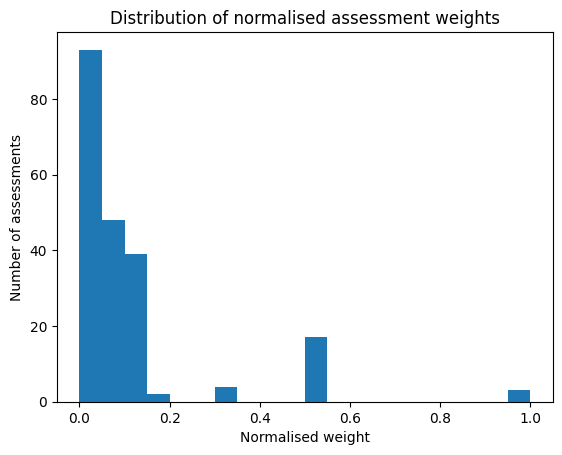

In [27]:
plt.hist(df_assessments['weight_norm'], bins=20)
plt.title('Distribution of normalised assessment weights')
plt.xlabel('Normalised weight')
plt.ylabel('Number of assessments')

Text(0, 0.5, 'Number of assessments')

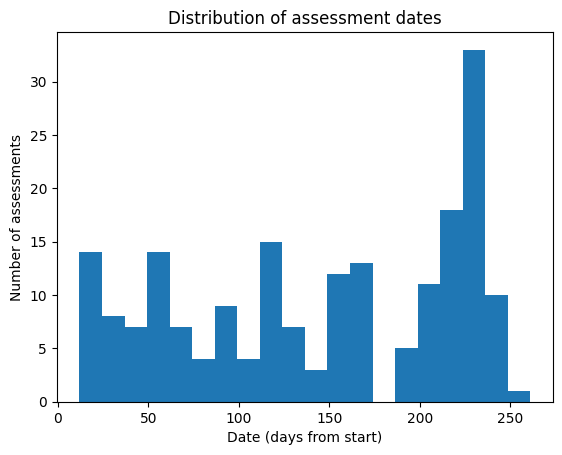

In [28]:
plt.hist(df_assessments['date'], bins=20)
plt.title('Distribution of assessment dates')
plt.xlabel('Date (days from start)')
plt.ylabel('Number of assessments')

In [29]:
# normalise date based on course length
# merge df_courses into df_assessments ; this makes df_courses obsolete
df_assessments = df_assessments.merge(df_courses,
                                      on=['code_module', 'code_presentation'],
                                      how='left')

df_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight,weight_norm,module_presentation_length,year,start_month
0,AAA,2013J,1752,TMA,19.0,10.0,0.05,268,2013,October
1,AAA,2013J,1753,TMA,54.0,20.0,0.10,268,2013,October
2,AAA,2013J,1754,TMA,117.0,20.0,0.10,268,2013,October
3,AAA,2013J,1755,TMA,166.0,20.0,0.10,268,2013,October
4,AAA,2013J,1756,TMA,215.0,30.0,0.15,268,2013,October
...,...,...,...,...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0,0.00,269,2014,October
202,GGG,2014J,37435,TMA,61.0,0.0,0.00,269,2014,October
203,GGG,2014J,37436,TMA,124.0,0.0,0.00,269,2014,October
204,GGG,2014J,37437,TMA,173.0,0.0,0.00,269,2014,October


In [30]:
df_assessments['date_norm'] = df_assessments['date']/df_assessments['module_presentation_length']
df_assessments['date_norm']

0      0.070896
1      0.201493
2      0.436567
3      0.619403
4      0.802239
         ...   
201    0.851301
202    0.226766
203    0.460967
204    0.643123
205    0.851301
Name: date_norm, Length: 206, dtype: float64

Text(0, 0.5, 'Number of assessments')

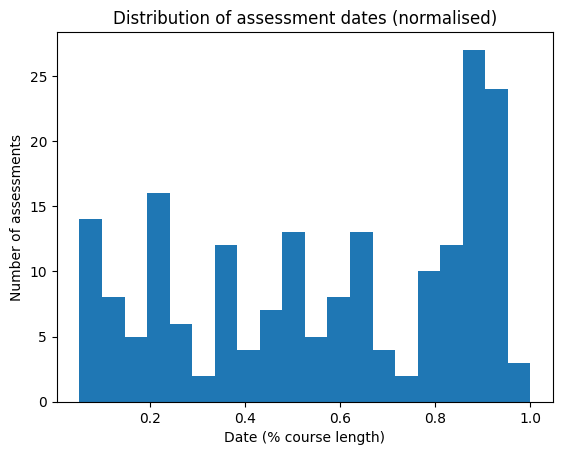

In [31]:
plt.hist(df_assessments['date_norm'], bins=20)
plt.title('Distribution of assessment dates (normalised)')
plt.xlabel('Date (% course length)')
plt.ylabel('Number of assessments')

In [32]:
# let's take a loot at the relationship between normalised date and normalised weight for the different assessment types
fig = px.scatter(df_assessments, x='date_norm', y='weight_norm', color='assessment_type', title='Scatter Plot with Color Grouping')
fig.show()

-> We see the importance of exams, and TMA in the scatter plot.

-> Exams are always done at the end of a presentation (last 15%). TMA stops around the same time exams start. CMA runs the whole year.

-> Exams always count for 50% or 100% of the total score.

In [33]:
# take a look at qualitative variables ; note, year is considered categorical here
df_assessments.describe(include='object')


,code_module,code_presentation,assessment_type,year,start_month
count,206,206,206,206,206
unique,7,4,3,2,2
top,FFF,2014J,TMA,2014,October
freq,52,57,106,114,110


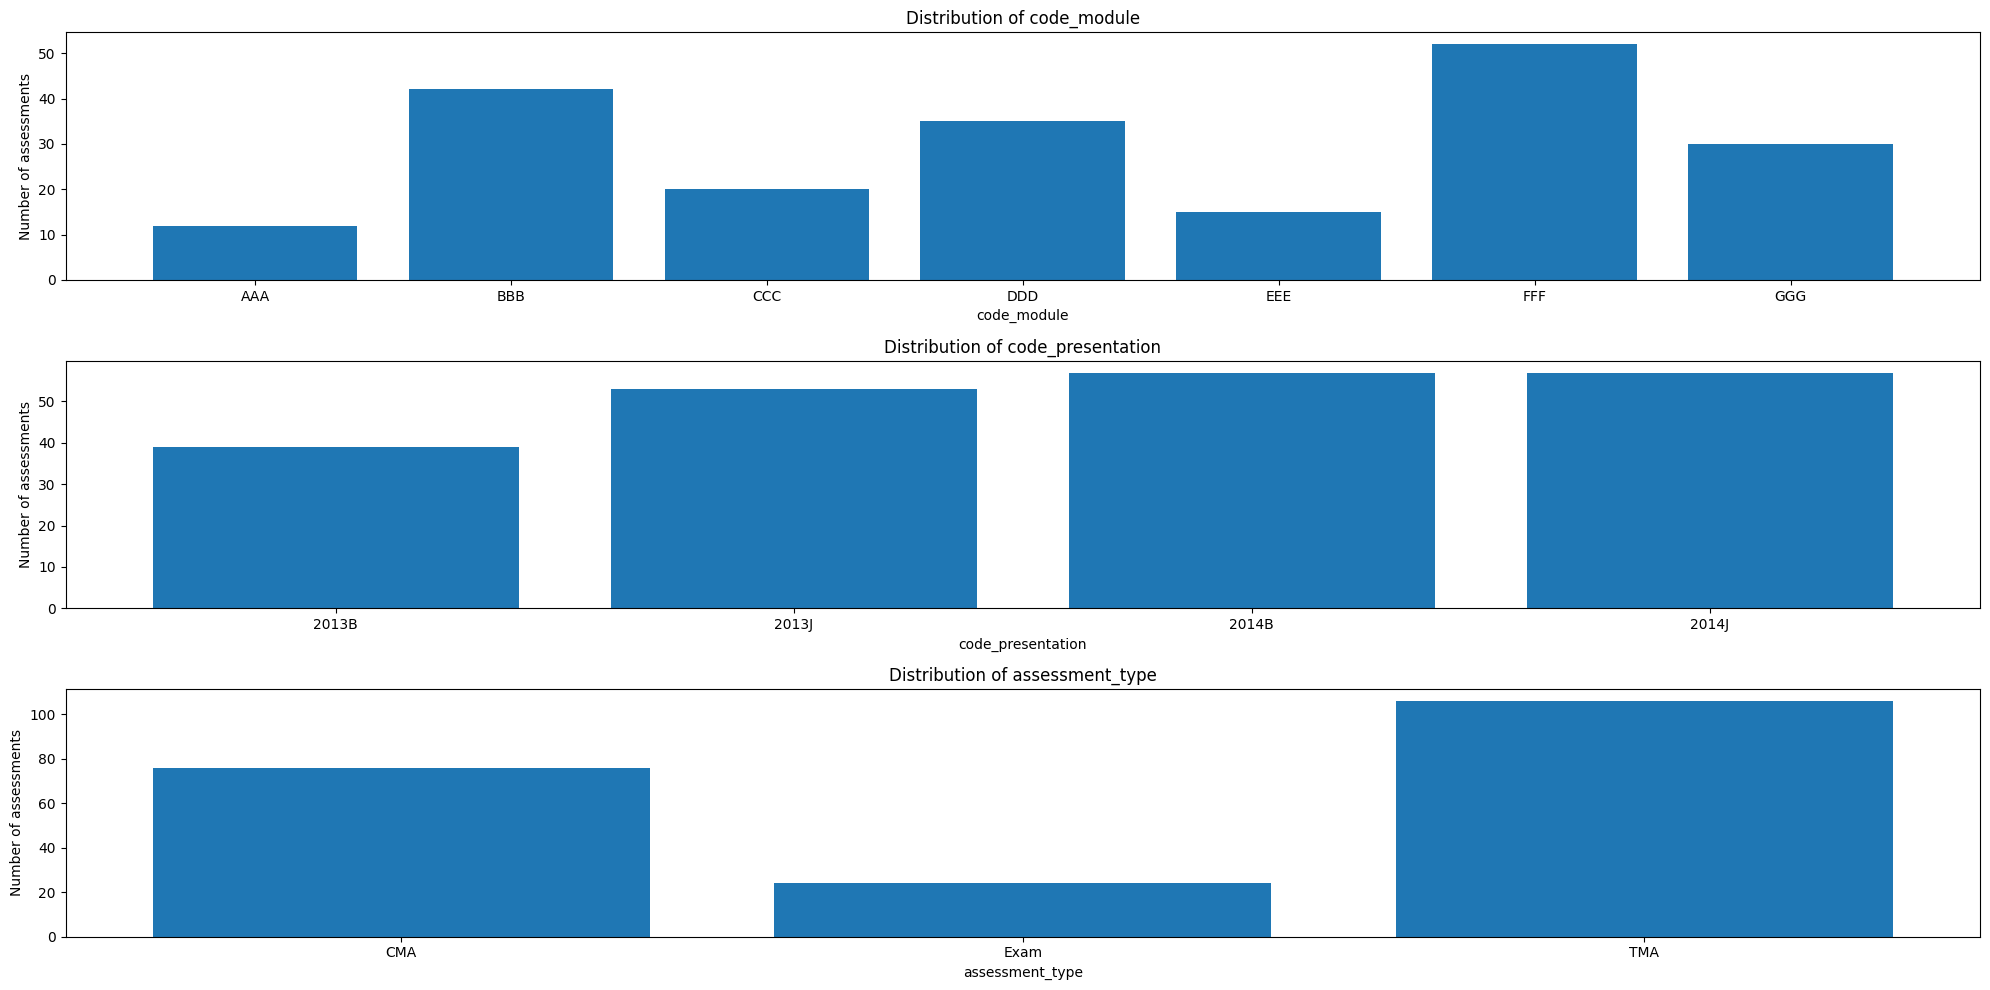

In [34]:
# distribution of assessment count for different categorical variables
cat_variables = ['code_module', 'code_presentation', 'assessment_type']

fig, axes = plt.subplots(3, 1, figsize=(20, 10))
axes = axes.flatten()

for i, variable in enumerate(cat_variables):
    data = df_assessments[f'{variable}'].value_counts().sort_index()
    ax = axes[i]

    ax.bar(data.index, data)
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(f'{variable}')
    ax.set_ylabel('Number of assessments')

plt.tight_layout()

In [35]:
# percentage of total weight per assessment type
weights_norm_grouped = df_assessments.groupby('assessment_type')['weight_norm'].sum()
total_weight = weights_norm_grouped.sum()
weights_norm_grouped_norm = weights_norm_grouped/total_weight
weights_norm_grouped_norm.round(2)*100

assessment_type
CMA      2.0
Exam    58.0
TMA     40.0
Name: weight_norm, dtype: float64

-> 58% of the assessments scores are dependent on exams ; CMA accounts for only 2% 

## VLE

id_site – an identification number of the material.

code_module – an identification code for module.

code_presentation - the identification code of presentation.

activity_type – the role associated with the module material.

week_from – the week from which the material is planned to be used.

week_to – week until which the material is planned to be used.

In [36]:
df_vle = dfs['vle'].copy()
df_vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [37]:
# check for duplicates
df_vle.duplicated().sum()

np.int64(0)

In [38]:
# check column types
df_vle.dtypes

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

In [39]:
df_vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [40]:
df_vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [41]:
# look how long vle are supposed to be used for the materials who hae values for week_from and week_to
(df_vle['week_to']-df_vle['week_from']).value_counts()

0.0    1111
1.0       8
2.0       2
Name: count, dtype: int64

-> Most course materials are only a week avaible.

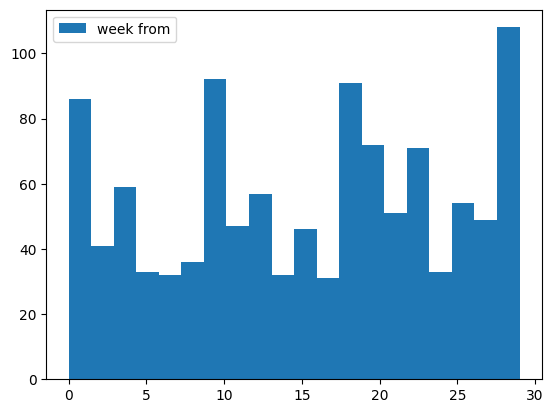

In [42]:
plt.hist(df_vle['week_from'], bins = 20, label='week from')
plt.legend()

-> this shape looks a lot like the distribution of assessments over the course length

In [43]:
df_vle.describe(include='object')

,code_module,code_presentation,activity_type
count,6364,6364,6364
unique,7,4,20
top,FFF,2013J,resource
freq,1967,1772,2660


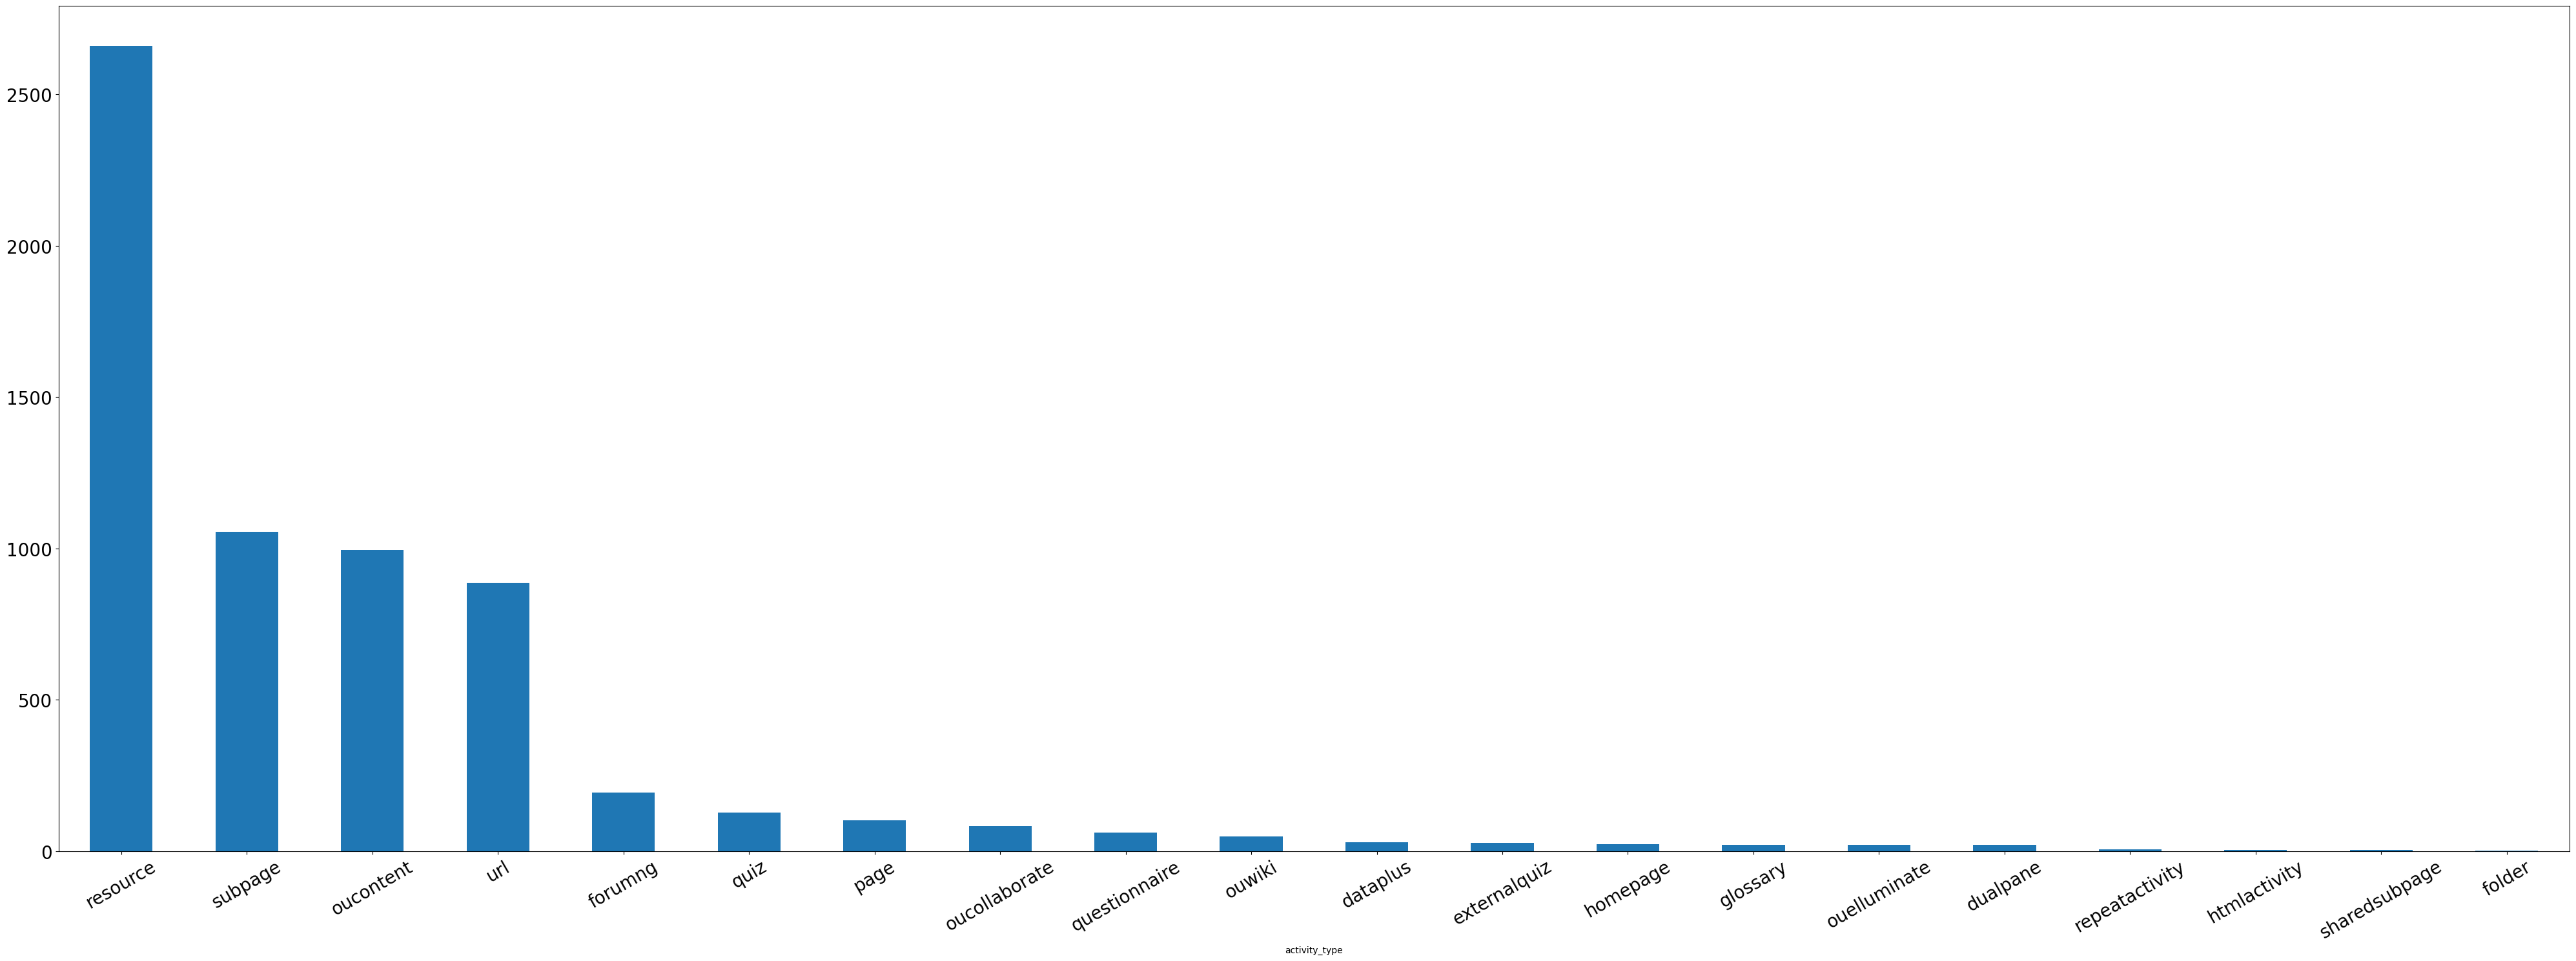

In [44]:
# chart of distribution activity_type 
df_vle['activity_type'].value_counts().plot(kind='bar', figsize=(40, 15), fontsize=20, rot=30)

plt.tight_layout()

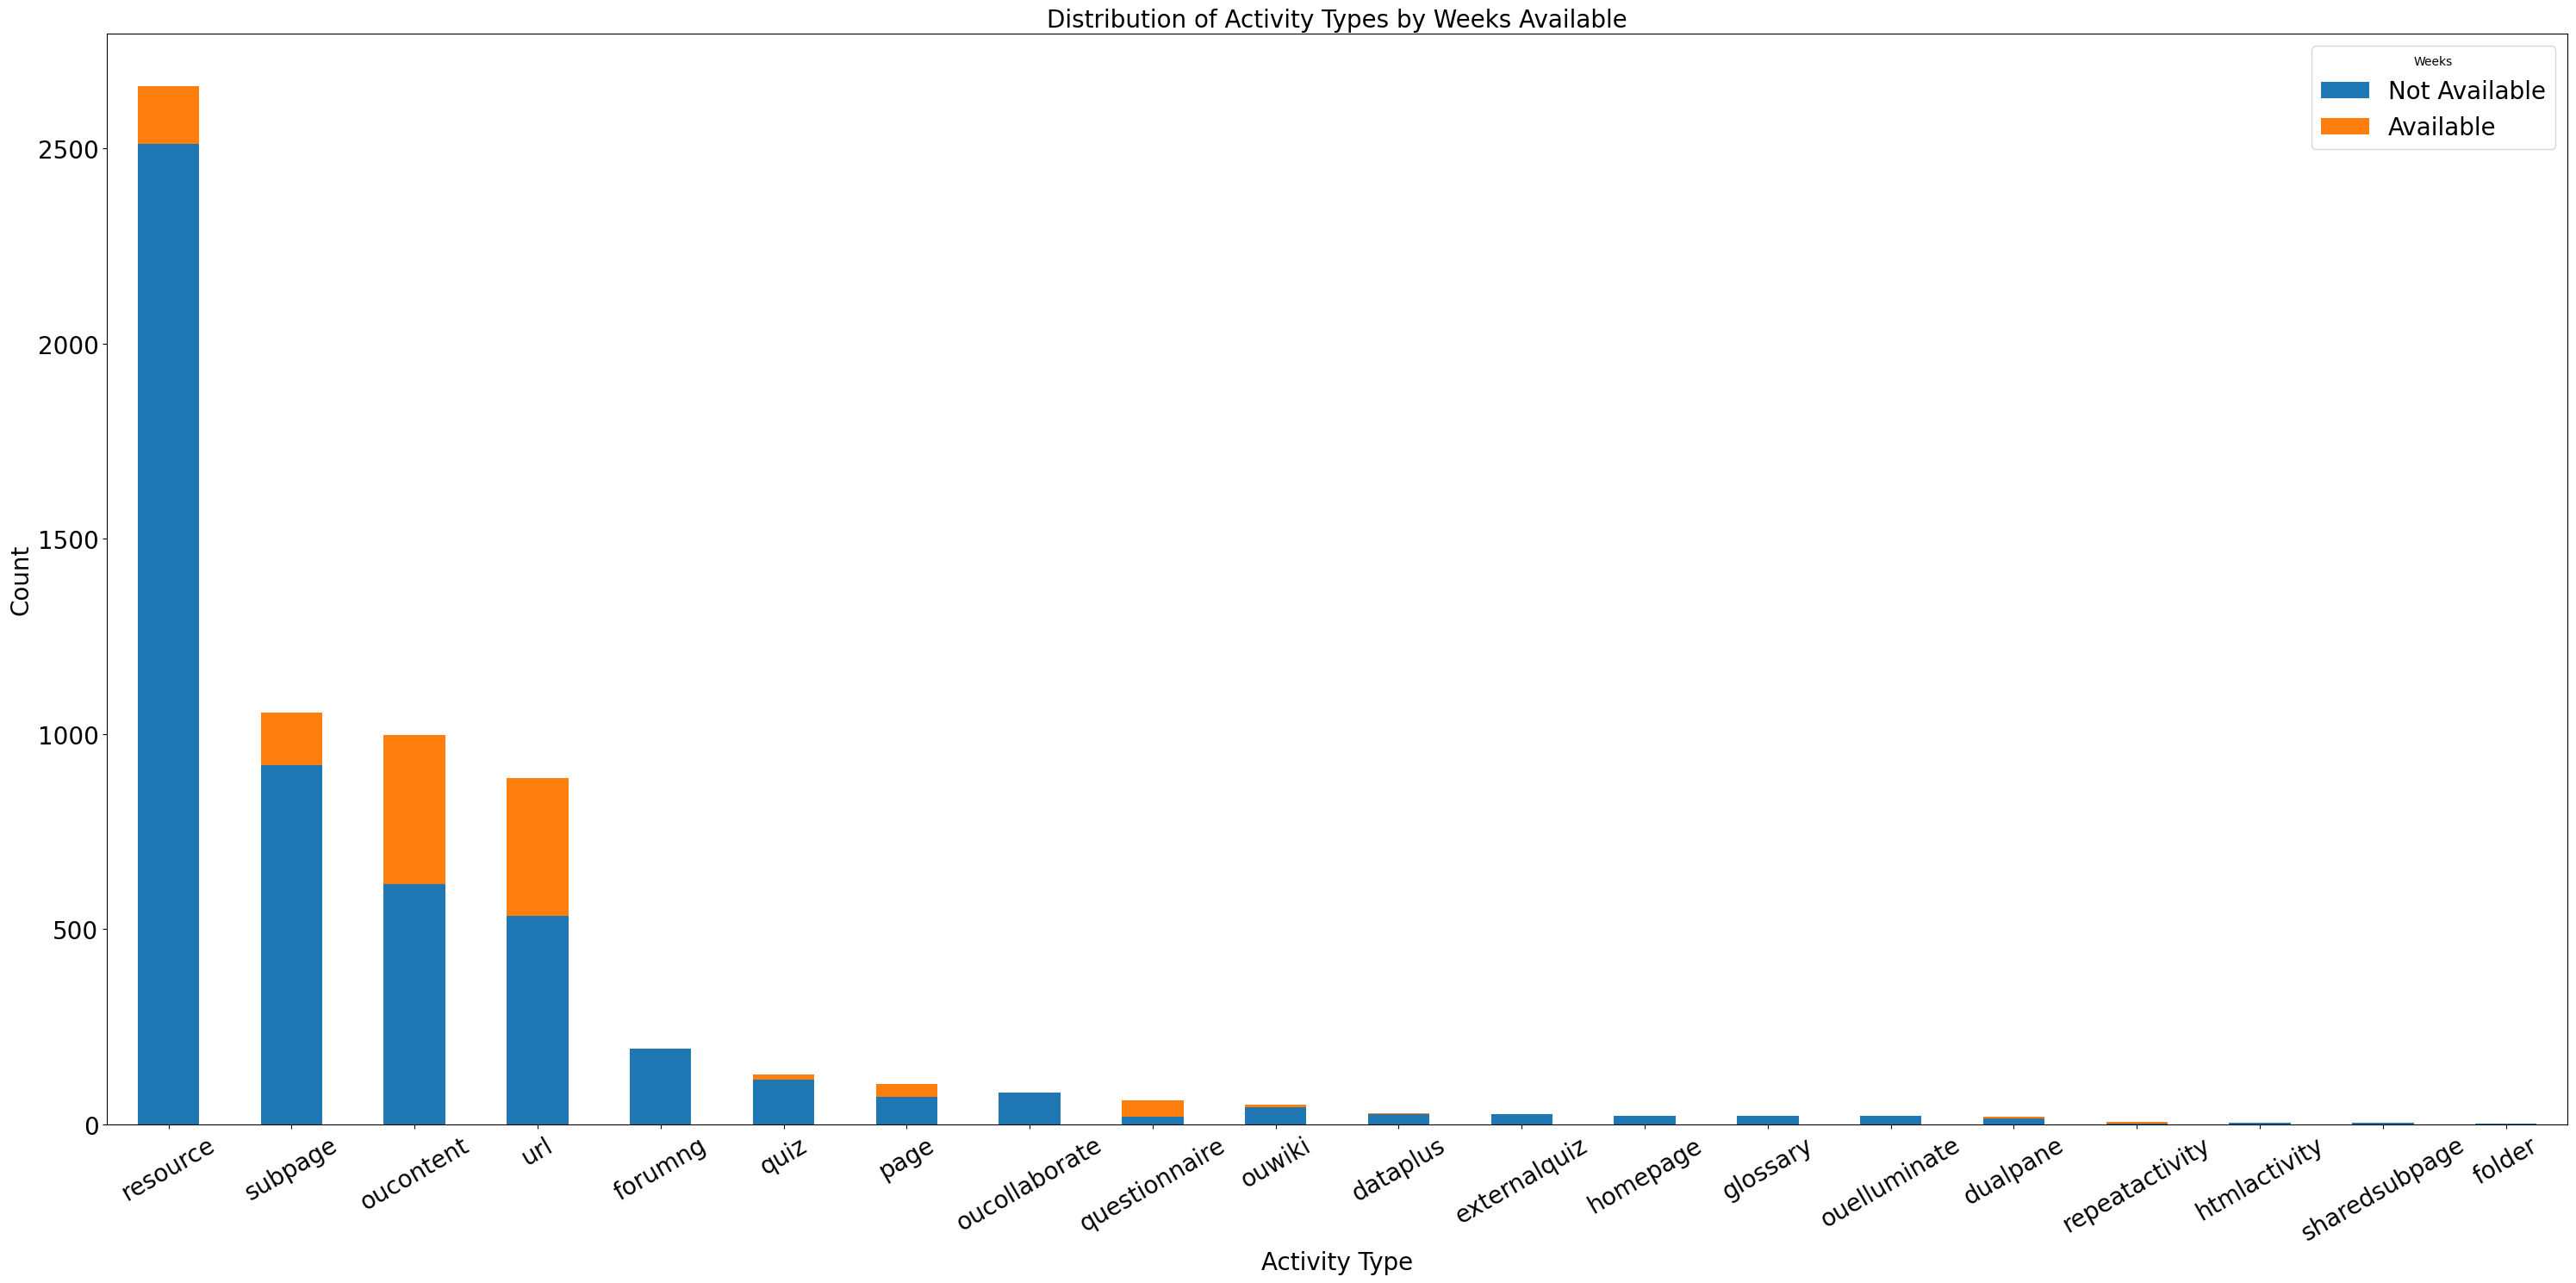

In [45]:
# let's take a look at the activity_type of vle that have the week_from & week_to available in comparison
df_vle['weeks_available'] = ((df_vle['week_from'].notna())&(df_vle['week_to'].notna()))

activity_weeks = pd.crosstab(df_vle['activity_type'], df_vle['weeks_available'])

# order based on bar size
activity_weeks['total'] = activity_weeks.sum(axis=1)
activity_weeks_sorted = activity_weeks.sort_values(by='total', ascending=False)
activity_weeks_sorted = activity_weeks_sorted.drop(columns='total')

fontsize=20

activity_weeks_sorted.plot(kind='bar', stacked=True, figsize=(30, 15), fontsize=fontsize, rot=30)

plt.title('Distribution of Activity Types by Weeks Available', fontsize=fontsize)
plt.xlabel('Activity Type', fontsize=fontsize)
plt.ylabel('Count', fontsize=fontsize)
plt.legend(title='Weeks', labels=['Not Available', 'Available'], fontsize=fontsize)
plt.tight_layout()
plt.show()

-> for oucontent and url the weeks are given relatively frequently.

## studentInfo

code_module – an identification code for a module on which the student is registered.

code_presentation - the identification code of the presentation during which the student is registered on the module.

id_student – a unique identification number for the student.

gender – the student’s gender.

region – identifies the geographic region, where the student lived while taking the module-presentation.

highest_education – highest student education level on entry to the module presentation.

imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

age_band – band of the student’s age.

num_of_prev_attempts – the number times the student has attempted this module.

studied_credits – the total number of credits for the modules the student is currently studying.

disability – indicates whether the student has declared a disability.

final_result – student’s final result in the module-presentation.

In [46]:
df_studentinfo = dfs['studentInfo'].copy()
df_studentinfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [47]:
# check for duplicates
df_studentinfo.duplicated().sum()

np.int64(0)

In [48]:
# check column types
df_studentinfo.dtypes

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [49]:
missings = df_studentinfo.isna().sum()
missings

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [50]:
# missing percentage 
missings/len(df_studentinfo)

code_module             0.000000
code_presentation       0.000000
id_student              0.000000
gender                  0.000000
region                  0.000000
highest_education       0.000000
imd_band                0.034087
age_band                0.000000
num_of_prev_attempts    0.000000
studied_credits         0.000000
disability              0.000000
final_result            0.000000
dtype: float64

In [51]:
df_studentinfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [52]:
df_studentinfo['id_student'].nunique()

28785

-> multiple lines for one id_student in this table

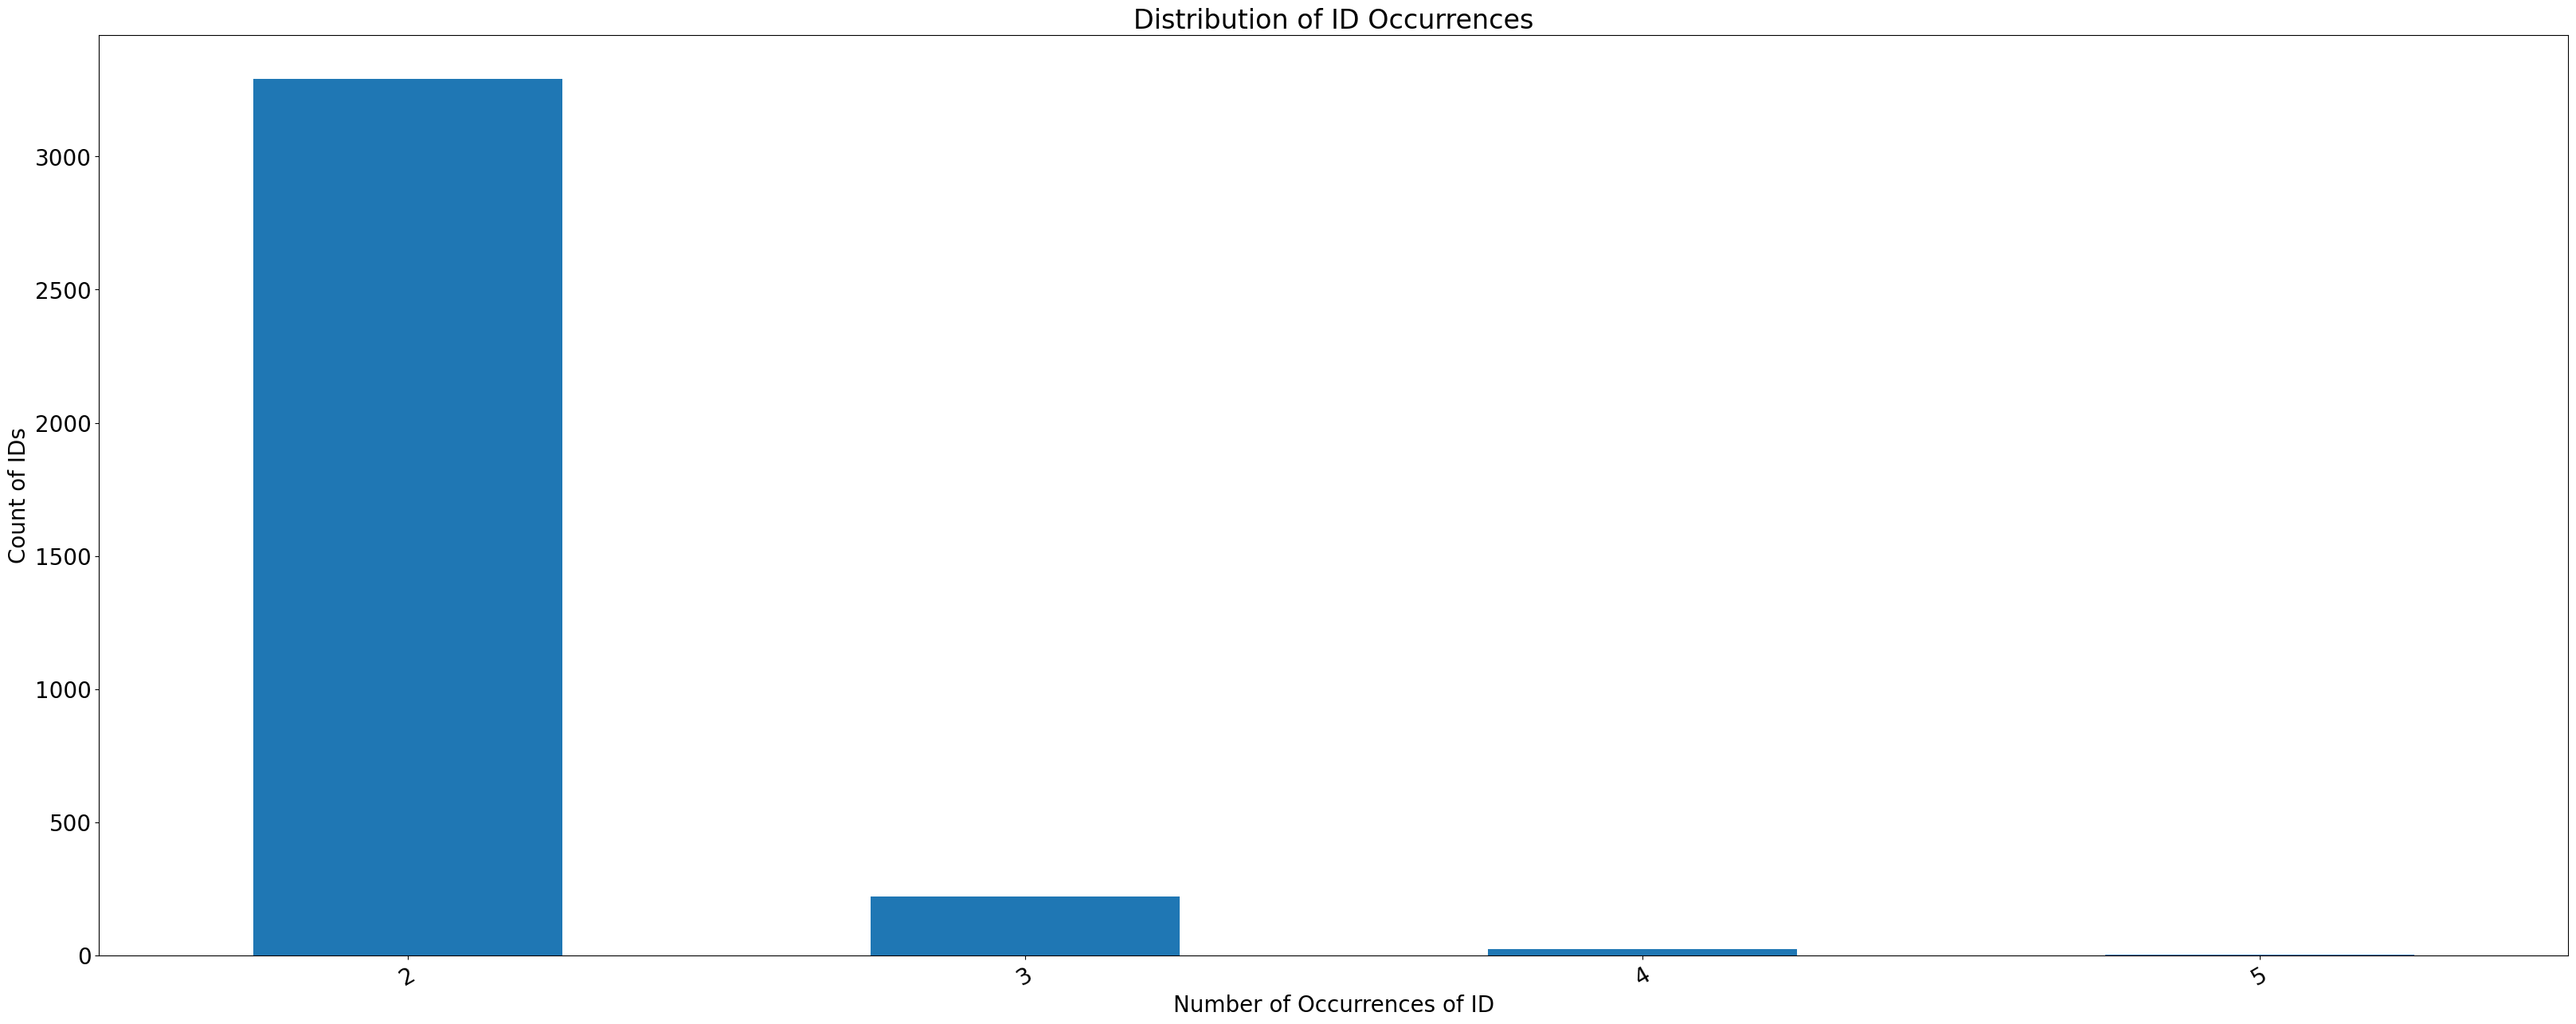

In [56]:
# how often do unique ids occure?
id_counts = df_studentinfo['id_student'].value_counts()
count_of_counts = id_counts.value_counts()
filtered_count_of_counts = count_of_counts[count_of_counts.index >= 2]

plt.figure(figsize=(40, 15))
filtered_count_of_counts.sort_index().plot(kind='bar', fontsize=20, rot=30)
plt.xlabel('Number of Occurrences of ID', fontsize=20)
plt.ylabel('Count of IDs', fontsize=20)
plt.title('Distribution of ID Occurrences', fontsize=24)
plt.show()

Text(0, 0.5, 'Number of course participations')

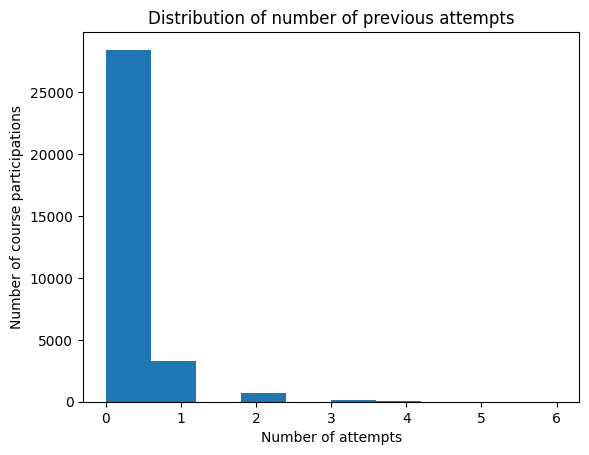

In [57]:
plt.hist(df_studentinfo['num_of_prev_attempts'], bins=None)
plt.title('Distribution of number of previous attempts')
plt.xlabel('Number of attempts')
plt.ylabel('Number of course participations')

Text(0, 0.5, 'Number of course participations')

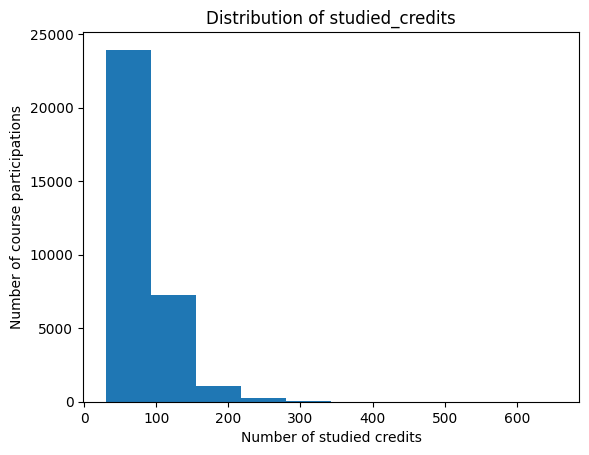

In [58]:
plt.hist(df_studentinfo['studied_credits'], bins=None)
plt.title('Distribution of studied_credits')
plt.xlabel('Number of studied credits')
plt.ylabel('Number of course participations')

In [59]:
df_studentinfo.describe(include='object')

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,31482,32593,32593,32593
unique,7,4,2,13,5,10,3,2,4
top,BBB,2014J,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,17875,3446,14045,3654,22944,29429,12361


C:\Users\user\AppData\Local\Temp\ipykernel_2572\2341723999.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



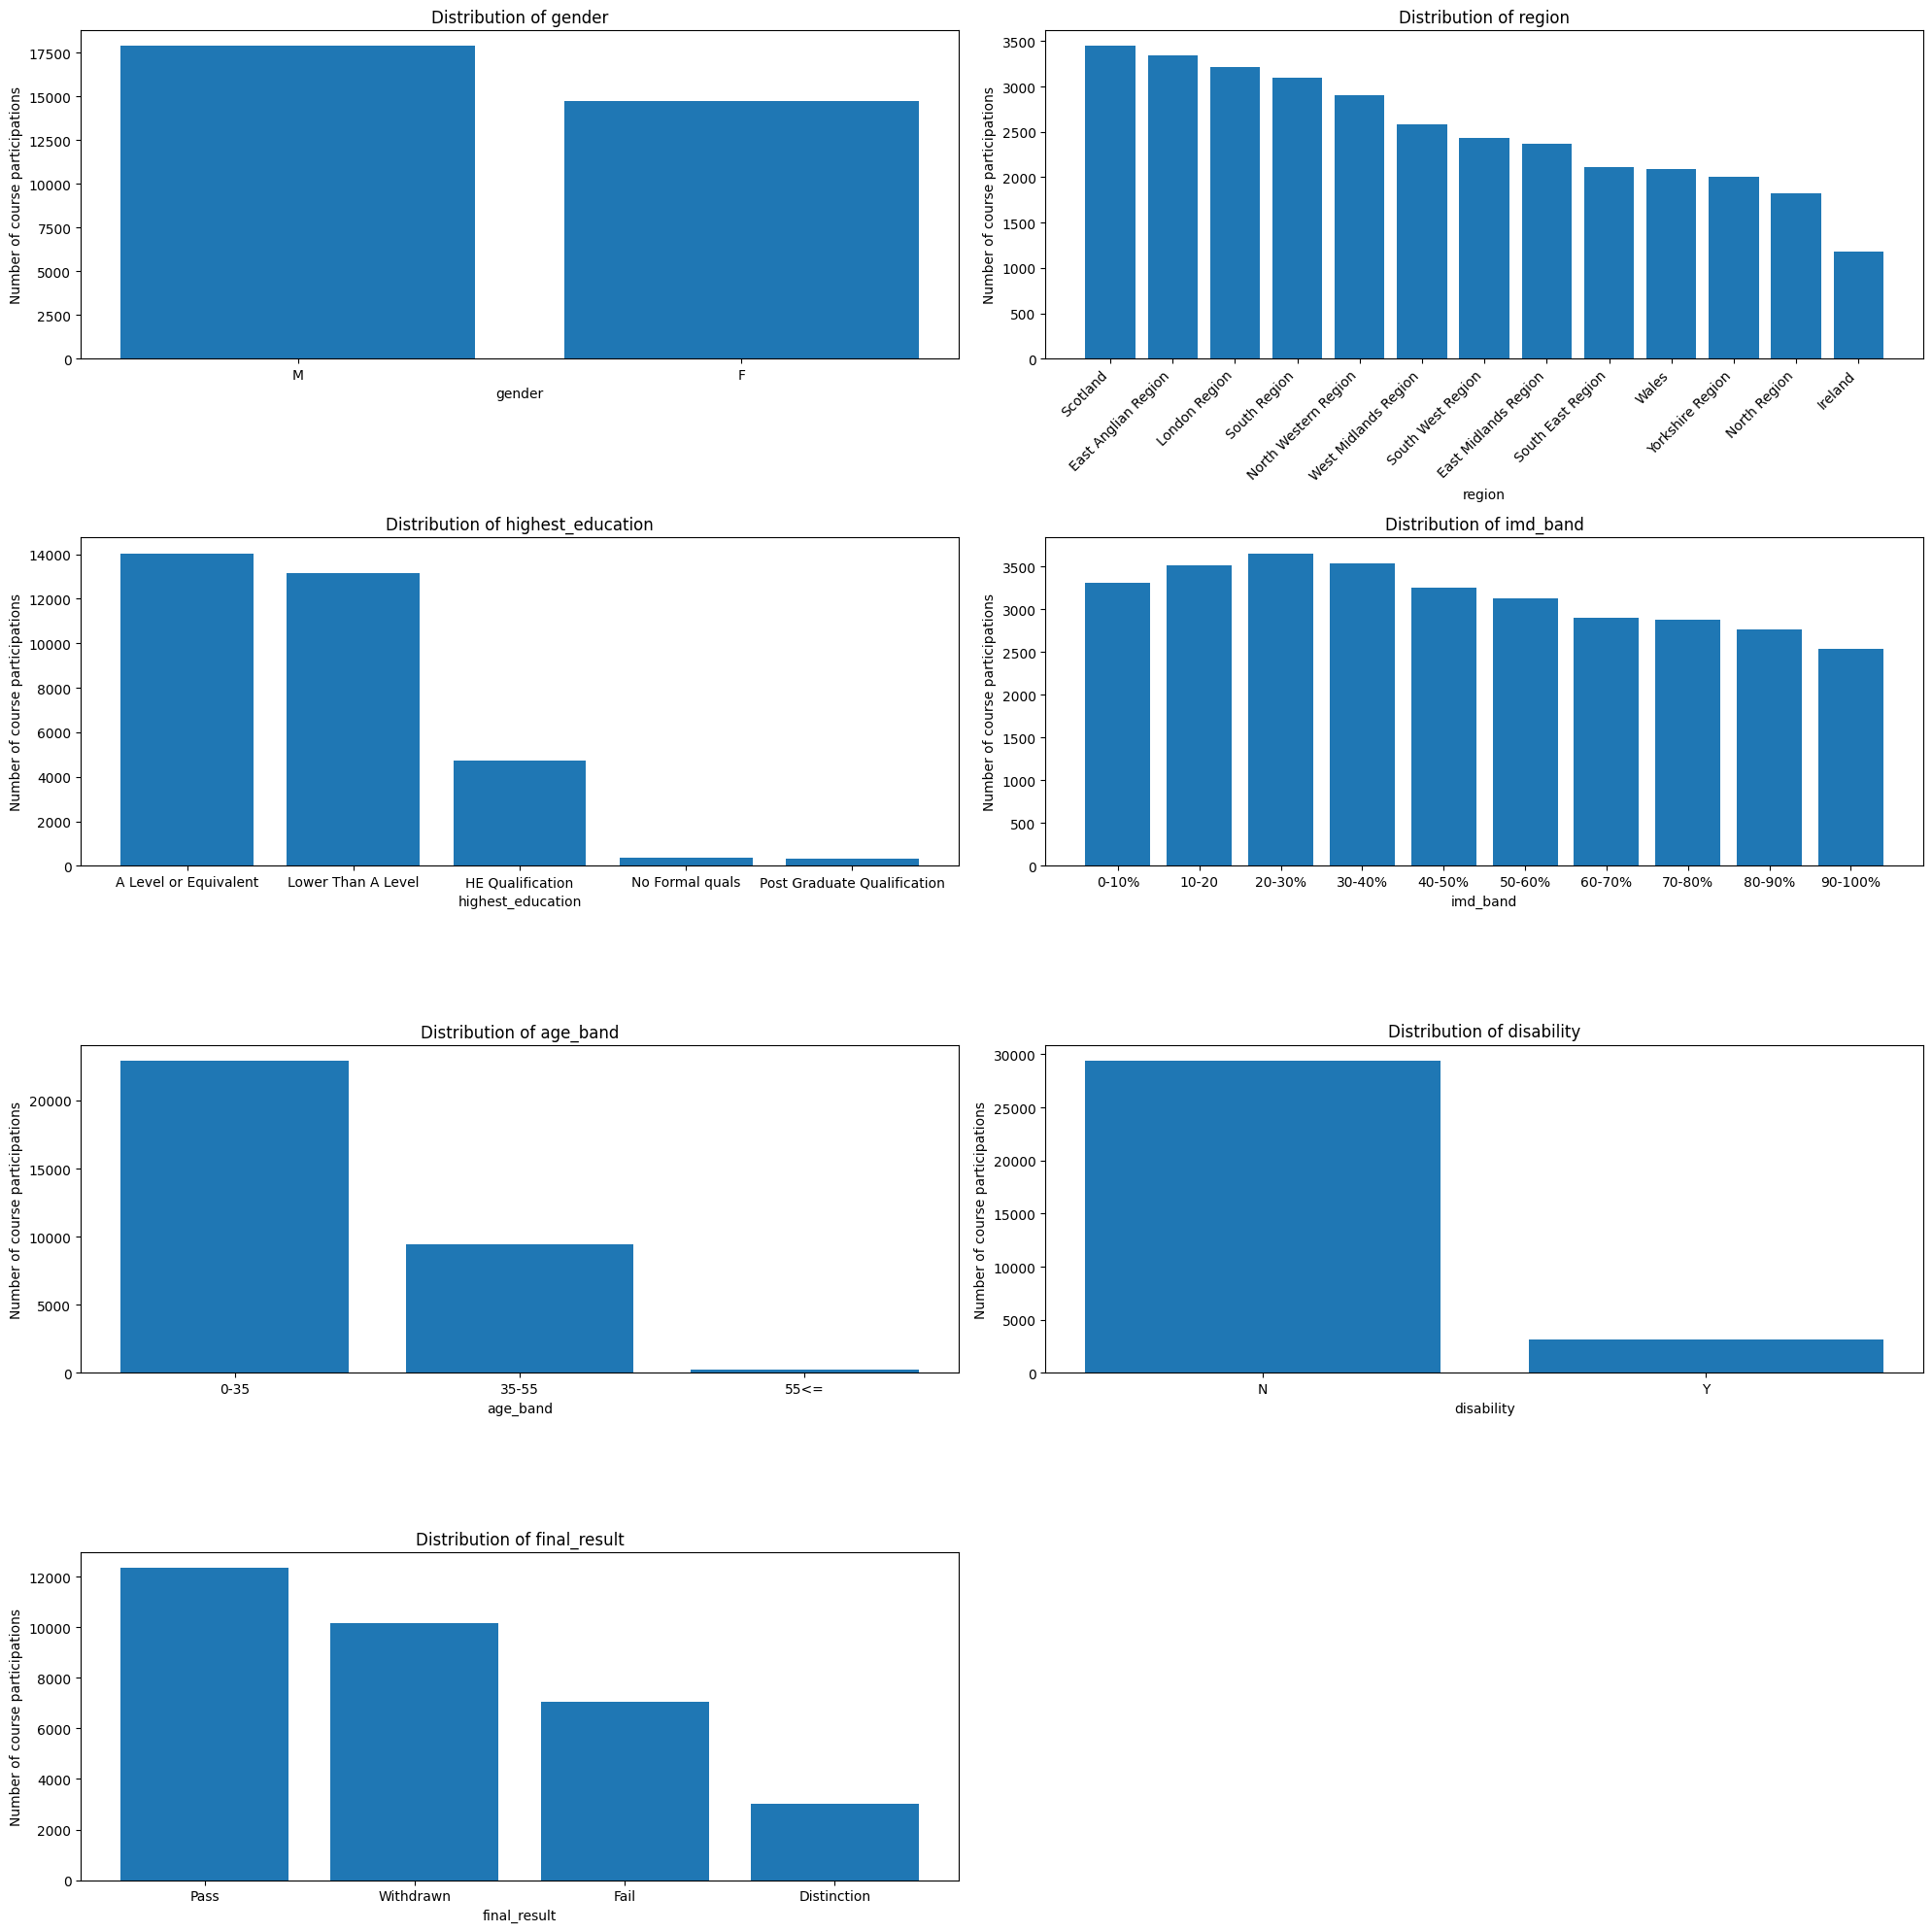

In [60]:
# distribution of each categorical variable
cat_variables = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()


for i, variable in enumerate(cat_variables):
    # sort bands on x axis descending
    if variable in ['imd_band', 'age_band']:
        data = df_studentinfo[f'{variable}'].value_counts().sort_index()
    else:
        data = df_studentinfo[f'{variable}'].value_counts()
    ax = axes[i]

    ax.bar(data.index, data)
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(f'{variable}')
    if variable == 'region':
        ax.set_xticklabels(data.index, rotation=45, ha='right')
    ax.set_ylabel('Number of course participations')
    

fig.delaxes(axes[-1])
plt.tight_layout()



## studentRegistration

code_module – an identification code for a module.

code_presentation - the identification code of the presentation.

id_student – a unique identification number for the student.

date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).

date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

In [63]:
df_studentregistration = dfs['studentRegistration']
df_studentregistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [89]:
# check for duplicates
df_studentregistration.duplicated().sum()

np.int64(0)

In [65]:
# check column types
df_studentregistration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [90]:
df_studentregistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [92]:
df_studentregistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [93]:
# check whether there are mising registration dates that weren't unregistered
df_studentregistration[df_studentregistration['date_unregistration'].isna() & df_studentregistration['date_registration'].isna()]


,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
12893,CCC,2014J,1777834,NaN,NaN
14392,DDD,2013B,2707979,NaN,NaN
14393,DDD,2013B,2710343,NaN,NaN
17559,DDD,2014B,2710343,NaN,NaN
23796,FFF,2013B,2102658,NaN,NaN


Only six missing registration dates where there wasn't unregistered

In [73]:
# check whether there are unregistrations without registration dates
df_unreg_missing_reg = df_studentregistration[df_studentregistration['date_unregistration'].notna() & df_studentregistration['date_registration'].isna()]
df_unreg_missing_reg


,code_module,code_presentation,id_student,date_registration,date_unregistration
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0
5573,BBB,2014B,614270,NaN,-142.0
6295,BBB,2014B,2409808,NaN,-109.0
6305,BBB,2014B,2439442,NaN,-149.0
8307,BBB,2014J,694001,NaN,-36.0
8975,CCC,2014B,394791,NaN,-61.0
9523,CCC,2014B,575419,NaN,-24.0


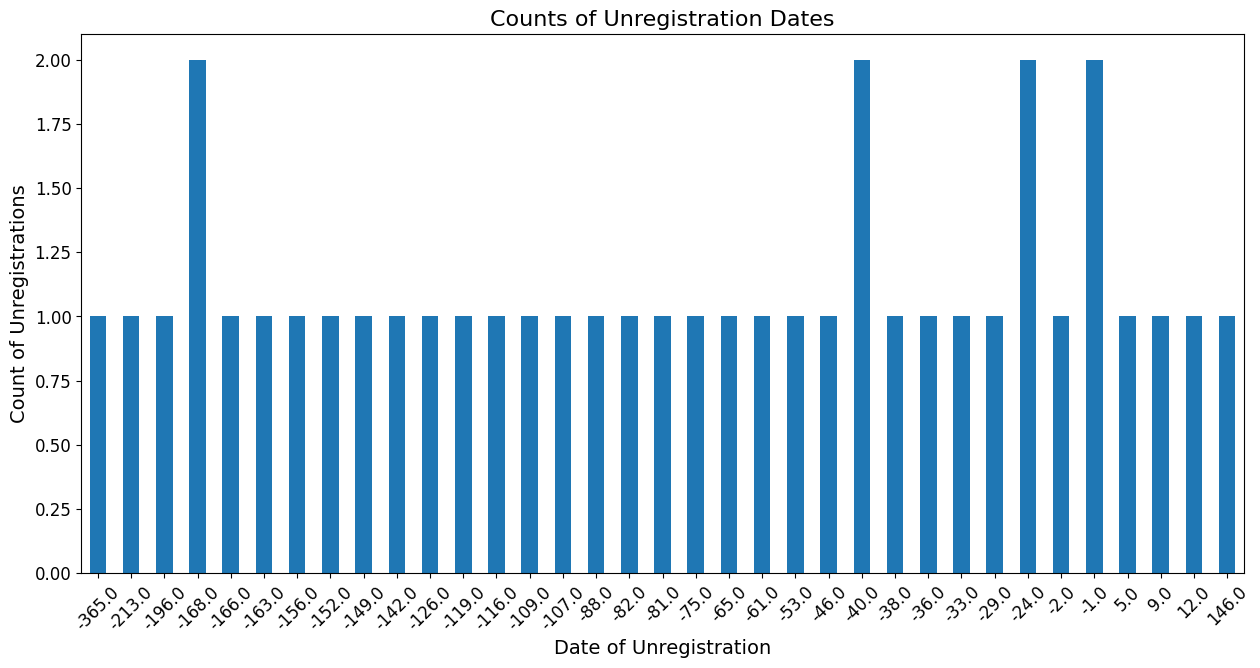

In [83]:
# Are missing registration dates mostly because the unregistration happened around or before the start of the course ?
# check whether there are unregistrations without registration dates
unreg_counts = df_unreg_missing_reg['date_unregistration'].value_counts().sort_index()
plt.figure(figsize=(15, 7))
unreg_counts.plot(kind='bar', fontsize=12, rot=45)
plt.xlabel('Date of Unregistration', fontsize=14)
plt.ylabel('Count of Unregistrations', fontsize=14)
plt.title('Counts of Unregistration Dates', fontsize=16)
plt.show()


Except for one case, the unregistrations happened early in the year (course start on date 0)

In [84]:
# merge dates of (un)registration into studentinfo table
df_studentinfo = df_studentinfo.merge(df_studentregistration[['code_module', 'code_presentation', 'id_student', 'date_registration', 'date_unregistration']],
                                      on=['code_module', 'code_presentation', 'id_student'],
                                      how='left')

df_studentinfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,NaN
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,NaN
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,NaN
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,101.0


In [85]:
# check if unregistration has the correct result (withdrawn)
df_studentinfo[df_studentinfo['date_unregistration'].notna()].final_result.value_counts()

final_result
Withdrawn    10063
Fail             9
Name: count, dtype: int64

In [ ]:
# Let's look at the 'Fail' attempts of people who unregistered
df_studentinfo[(df_studentinfo['date_unregistration'].notna())&(df_studentinfo['final_result']=='Fail')]


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
2777,BBB,2013J,362907,F,South West Region,Lower Than A Level,20-30%,35-55,2,60,N,Fail,-37.0,0.0
2786,BBB,2013J,365288,F,South Region,A Level or Equivalent,70-80%,0-35,0,60,N,Fail,-75.0,0.0
3340,BBB,2013J,554243,F,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Fail,-35.0,166.0
14625,DDD,2013J,315082,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,-73.0,0.0
14768,DDD,2013J,403052,F,Yorkshire Region,HE Qualification,20-30%,0-35,0,150,N,Fail,-22.0,0.0
15577,DDD,2013J,582954,M,London Region,Lower Than A Level,10-20,0-35,0,120,N,Fail,-81.0,-7.0
24057,FFF,2013J,234004,M,Yorkshire Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,-33.0,0.0
24537,FFF,2013J,523777,M,North Region,A Level or Equivalent,0-10%,35-55,1,60,N,Fail,-60.0,0.0
25685,FFF,2013J,601640,M,London Region,HE Qualification,20-30%,0-35,0,90,N,Fail,-58.0,-4.0


Mostly late unregistrations

Text(0, 0.5, 'Registration Duration (days)')

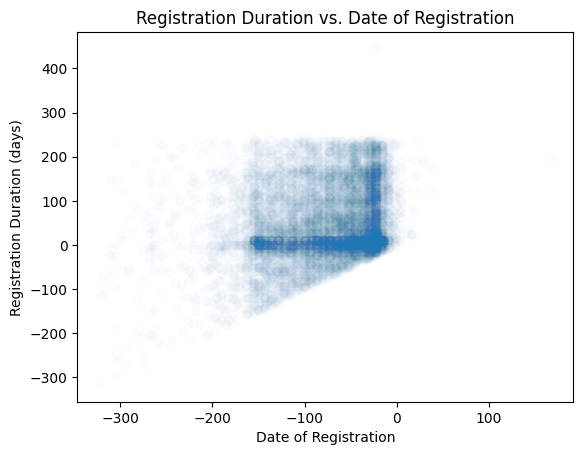

In [ ]:
# Look at relationship between date of registration and unregistration
plt.scatter(df_studentinfo['date_registration'], df_studentinfo['date_unregistration'], alpha=0.01)
plt.title('Registration Duration vs. Date of Registration')
plt.xlabel('Date of Registration')
plt.ylabel('Registration Duration (days)')

-> a lot of people register around the start of the course
-> a lot of people unregister slightly before the start of the course

In [86]:
# check period between registration and unregistration
df_studentinfo['registration_duration'] = (df_studentinfo['date_unregistration']-df_studentinfo['date_registration'])
df_studentinfo['registration_duration'].describe()

count    10033.000000
mean       128.797568
std         85.694853
min          0.000000
25%         57.000000
50%        117.000000
75%        186.000000
max        531.000000
Name: registration_duration, dtype: float64

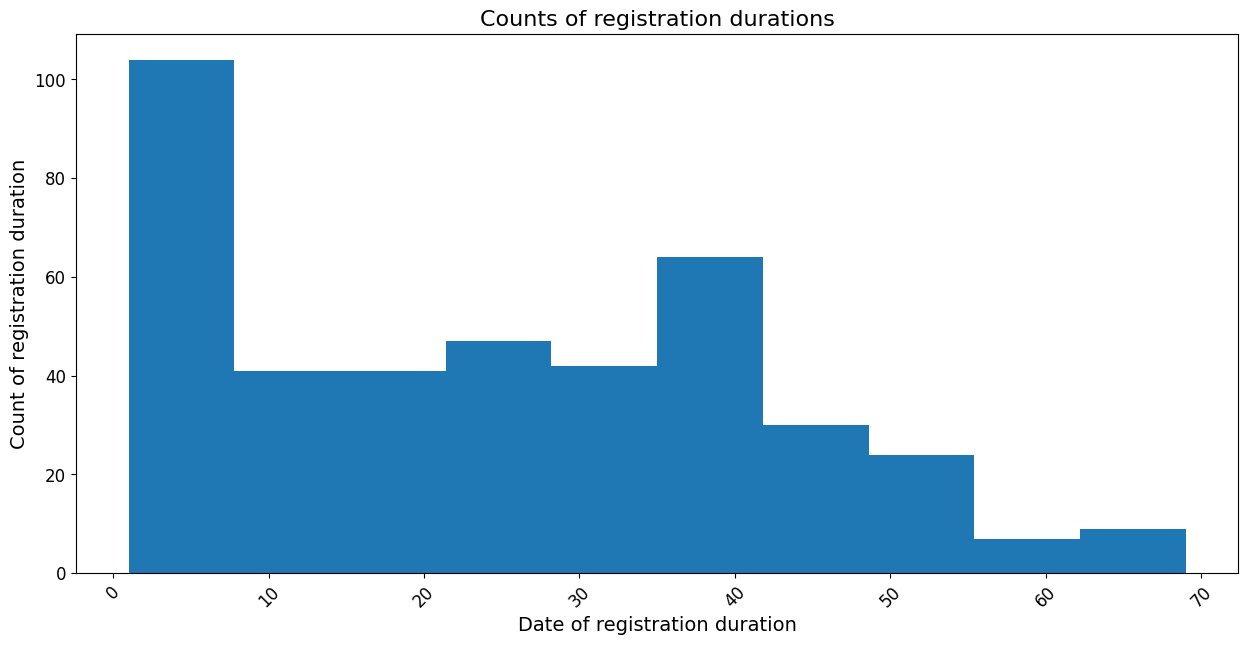

In [94]:
# check period between registration and unregistration
df_studentinfo['registration_duration'] = (df_studentinfo['date_unregistration']-df_studentinfo['date_registration'])
date_counts = df_studentinfo['registration_duration'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
date_counts.plot(kind='hist', fontsize=12, rot=45)
plt.xlabel('Date of registration duration', fontsize=14)
plt.ylabel('Count of registration duration', fontsize=14)
plt.title('Counts of registration durations', fontsize=16)
plt.show()


-> most people seem to unregister soon after registering

## studentAssessment

id_assessment – the identification number of the assessment.

id_student – a unique identification number for the student.

date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.

is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.

score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [109]:
df_studentassessment = dfs['studentAssessment']
df_studentassessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [110]:
# check for duplicates
df_studentassessment.duplicated().sum()

np.int64(0)

In [111]:
# check column types
df_studentassessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [112]:
df_studentassessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [113]:
df_studentassessment[df_studentassessment.score.isna()]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


In [114]:
# check whether missings are found in a few assessments only
df_studentassessment[df_studentassessment.score.isna()].id_assessment.value_counts()


id_assessment
25339    7
15013    7
34860    6
25363    5
14984    5
        ..
34887    1
34886    1
34903    1
37415    1
37427    1
Name: count, Length: 78, dtype: int64

-> missings in many different assessments

In [116]:
# check why some scores are missing for specific assessment
id = 25339

# check due date of assignment of specific assessment
df_assessments[df_assessments.id_assessment==id].date

86    200.0
Name: date, dtype: float64

In [117]:
# check when assignments were submitted for rows without score
df_studentassessment[(df_studentassessment.id_assessment==id)&(df_studentassessment.score.isna())]

,id_assessment,id_student,date_submitted,is_banked,score
69153,25339,560260,201,0,NaN
69277,25339,191896,221,0,NaN
69285,25339,241771,203,0,NaN
69292,25339,252489,213,0,NaN
69365,25339,412731,211,0,NaN
69367,25339,413934,221,0,NaN
69371,25339,415695,214,0,NaN


-> all NaN scores where submitted late for this assessment (after day 200)

In [118]:
# check whether this is the case for all NaN scores
# merge df_assessments (date, date_norm, assessment_type) into df_studentassessment
df_studentassessment = df_studentassessment.merge(df_assessments[['code_module', 'code_presentation','id_assessment', 'date','date_norm', 'assessment_type']],
                                      on='id_assessment',
                                      how='left')

# add relative date of submission (0 = deadline)
df_studentassessment['date_submitted_relative'] = df_studentassessment['date_submitted'] - df_studentassessment['date']

df_studentassessment

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,date,date_norm,assessment_type
0,1752,11391,18,0,78.0,AAA,2013J,19.0,0.070896,TMA
1,1752,28400,22,0,70.0,AAA,2013J,19.0,0.070896,TMA
2,1752,31604,17,0,72.0,AAA,2013J,19.0,0.070896,TMA
3,1752,32885,26,0,69.0,AAA,2013J,19.0,0.070896,TMA
4,1752,38053,19,0,79.0,AAA,2013J,19.0,0.070896,TMA
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,229.0,0.851301,CMA
173908,37443,534672,229,0,100.0,GGG,2014J,229.0,0.851301,CMA
173909,37443,546286,215,0,80.0,GGG,2014J,229.0,0.851301,CMA
173910,37443,546724,230,0,100.0,GGG,2014J,229.0,0.851301,CMA


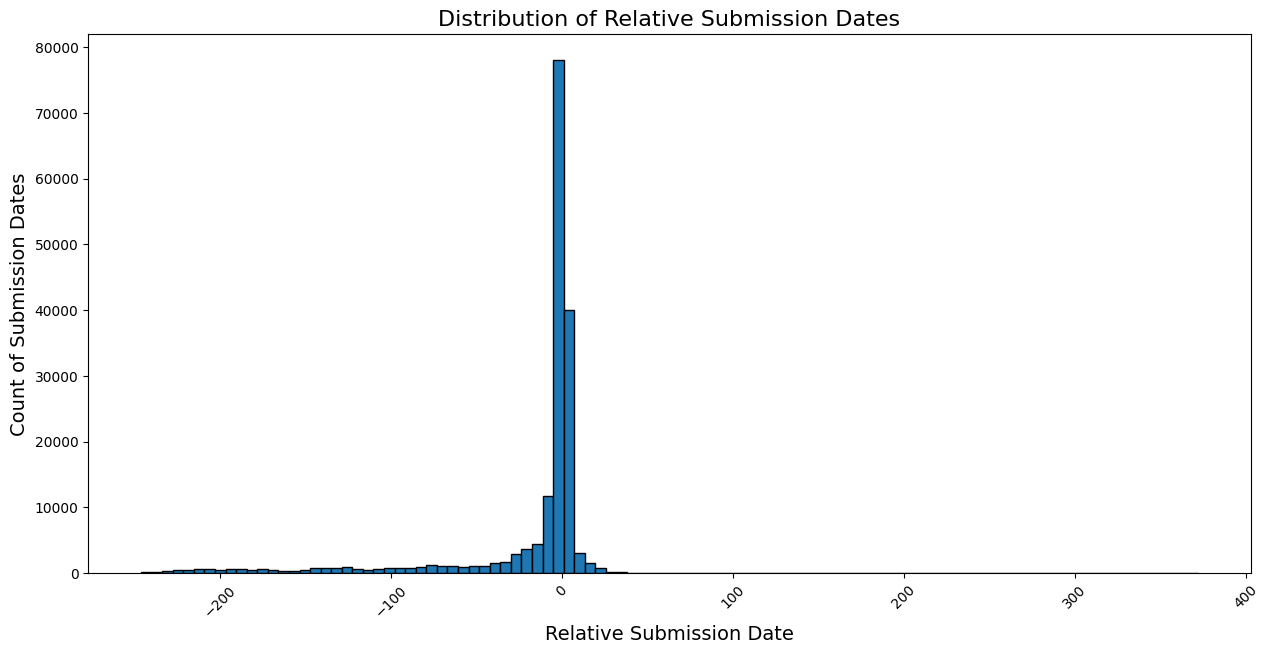

In [127]:
# plot relative submission date
# check period between registration and unregistration
date_counts = df_studentassessment['date_submitted_relative'].value_counts()

plt.figure(figsize=(15, 7))
plt.hist(df_studentassessment['date_submitted_relative'].dropna(), bins=100, edgecolor='black')
plt.xlabel('Relative Submission Date', fontsize=14)
plt.ylabel('Count of Submission Dates', fontsize=14)
plt.title('Distribution of Relative Submission Dates', fontsize=16)
plt.xticks(rotation=45)
plt.show()

-> most submissions are right before the deadline

In [129]:
df_studentassessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score,date,date_norm,date_submitted_relative
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000,171047.000000,171047.000000,171047.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573,130.605623,0.511954,-16.657989
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107,78.025175,0.304545,45.945880
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000,12.000000,0.051282,-246.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000,54.000000,0.212500,-6.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000,129.000000,0.488806,-1.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000,214.000000,0.851301,2.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000,261.000000,1.000000,372.000000


Check distributions of variables

Text(0, 0.5, 'Number of course participations')

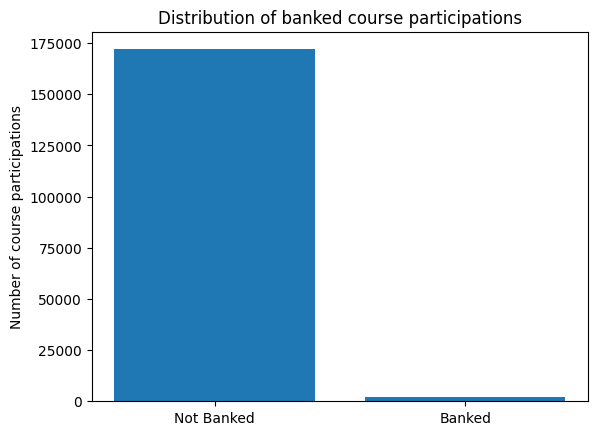

In [132]:
# banked (assessment result transferred from previous presentation)
data = df_studentassessment['is_banked'].astype(bool).value_counts()
plt.bar(data.index.map({True: 'Banked', False: 'Not Banked'}), data)
plt.title('Distribution of banked course participations')
plt.ylabel('Number of course participations')

Text(0, 0.5, 'Number of course participations')

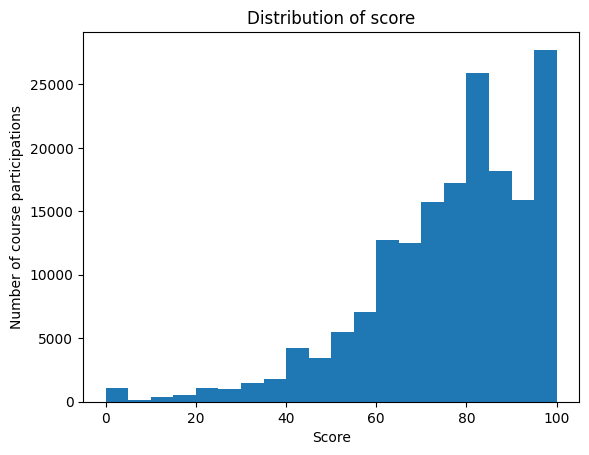

In [131]:
# score
plt.hist(df_studentassessment['score'], bins=20)
plt.title('Distribution of score')
plt.xlabel('Score')
plt.ylabel('Number of course participations')

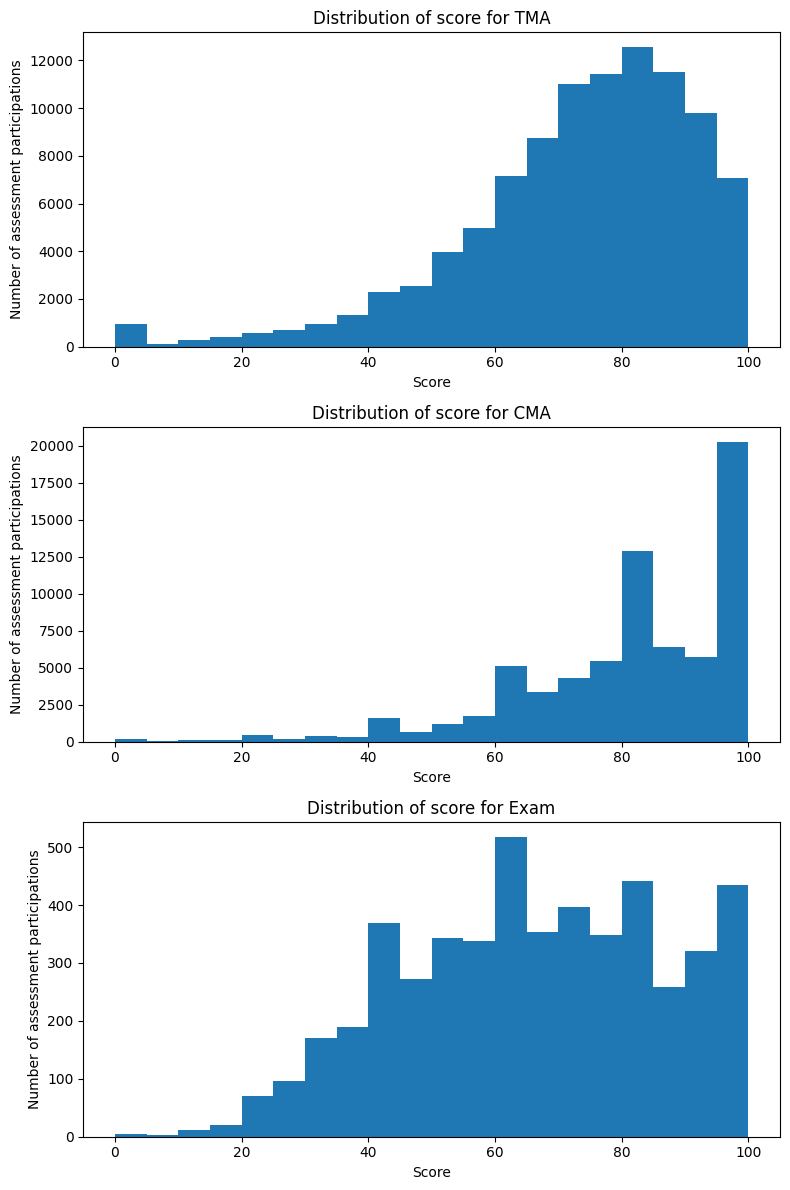

In [133]:
# score per assessment_type
unique_assessment_types = df_studentassessment['assessment_type'].unique()

fig, axes = plt.subplots(len(unique_assessment_types), 1, figsize=(8, 4 * len(unique_assessment_types)))

for i, assessment_type in enumerate(unique_assessment_types):
    data = df_studentassessment[df_studentassessment['assessment_type'] == assessment_type]['score']

    axes[i].hist(data, bins=20)
    axes[i].set_title(f'Distribution of score for {assessment_type}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Number of assessment participations')

plt.tight_layout()

In [135]:
# categorical variables
df_studentassessment.describe(include='object')


,code_module,code_presentation,assessment_type
count,173912,173912,173912
unique,7,4,3
top,FFF,2014J,TMA
freq,54815,52174,98426


Text(0, 0.5, 'Number of assessment participations')

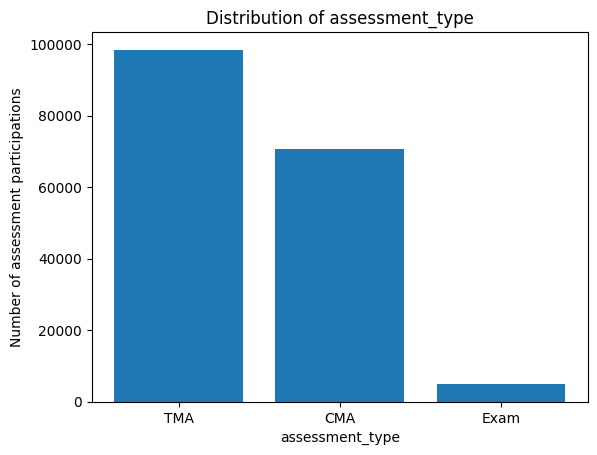

In [136]:
# distribution of assessment_type
data = df_studentassessment['assessment_type'].value_counts()

plt.bar(data.index, data)
plt.title(f'Distribution of assessment_type')
plt.xlabel('assessment_type')
plt.ylabel('Number of assessment participations')

## studentVle

code_module – an identification code for a module.

code_presentation - the identification code of the module presentation.

id_student – a unique identification number for the student.

id_site - an identification number for the VLE material.

date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.

sum_click – the number of times a student interacts with the material in that day

In [138]:
df_studentvle = dfs['studentVle'].copy()
df_studentvle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [139]:
# check for duplicates
df_studentvle.duplicated().sum()

np.int64(787170)

In [145]:
#look at duplicates
df_studentvle[df_studentvle.duplicated()].sort_values(by=['id_student','id_site','date'])

,code_module,code_presentation,id_student,id_site,date,sum_click
211472,AAA,2014J,6516,877012,13,3
219392,AAA,2014J,6516,877012,19,1
222230,AAA,2014J,6516,877012,22,3
237150,AAA,2014J,6516,877012,41,1
243858,AAA,2014J,6516,877012,49,1
...,...,...,...,...,...,...
1551890,BBB,2014J,2698588,913528,13,1
1551888,BBB,2014J,2698588,913535,13,1
1648437,BBB,2014J,2698588,913537,52,1
1858188,BBB,2014J,2698588,926339,200,1


-> it makes sense that the same student clicked on the same resource a same number of times in the same day ; unclear how sum_click is calculated in that case

In [146]:
# check column types
df_studentvle.dtypes

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object

In [147]:
df_studentvle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [148]:
df_studentvle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


Text(0, 0.5, 'Number of interactions')

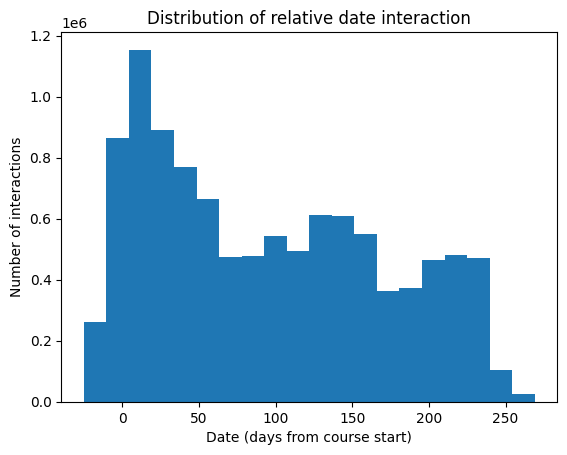

In [150]:
# distribution of date (days since start presentation)
plt.hist(df_studentvle['date'], bins=20)
plt.title('Distribution of relative date interaction')
plt.xlabel('Date (days from course start)')
plt.ylabel('Number of interactions')

-> it seems the distribution is multimodal, possibly related to assessment dates

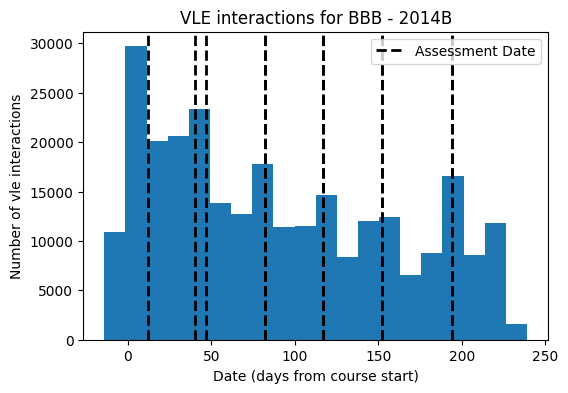

In [153]:
# check for a specific course if interactions are related to assessments
code_module = 'BBB'
code_presentation = '2014B'
def chart_assessment_studentinteraction(ax, code_module, code_presentation):
    # create subset of code_module, code_presentation
    presentation_assessments = df_assessments[(df_assessments['code_module'] == code_module) & (df_assessments['code_presentation'] == code_presentation)]
    presentation_interactions = df_studentvle[(df_studentvle['code_module'] == code_module) & (df_studentvle['code_presentation'] == code_presentation)]

    # plot vle interactions
    x_range = (presentation_interactions['date'].min()-5, presentation_interactions['date'].max()+5)
    ax.hist(presentation_interactions['date'], bins=20, range=x_range)
    ax.set_title(f'VLE interactions for {code_module} - {code_presentation}')
    ax.set_xlabel('Date (days from course start)')
    ax.set_ylabel('Number of vle interactions')
    # add vertical lines for assessments
    for date in presentation_assessments.date:
        ax.axvline(x=date, color='black', linestyle='--', linewidth=2)

    ax.legend(['Assessment date'], loc='upper right')
  
fig, ax = plt.subplots(figsize=(6, 4))
chart_assessment_studentinteraction(ax, code_module, code_presentation)

-> increased interaction with vle around assessment dates

Creating plot 1: AAA - 2013J
Creating plot 2: AAA - 2014J
Creating plot 3: BBB - 2013B
Creating plot 4: BBB - 2013J
Creating plot 5: BBB - 2014B
Creating plot 6: BBB - 2014J
Creating plot 7: CCC - 2014B
Creating plot 8: CCC - 2014J
Creating plot 9: DDD - 2013B
Creating plot 10: DDD - 2013J
Creating plot 11: DDD - 2014B
Creating plot 12: DDD - 2014J
Creating plot 13: EEE - 2013J
Creating plot 14: EEE - 2014B
Creating plot 15: EEE - 2014J
Creating plot 16: FFF - 2013B
Creating plot 17: FFF - 2013J
Creating plot 18: FFF - 2014B
Creating plot 19: FFF - 2014J
Creating plot 20: GGG - 2013J
Creating plot 21: GGG - 2014B
Creating plot 22: GGG - 2014J


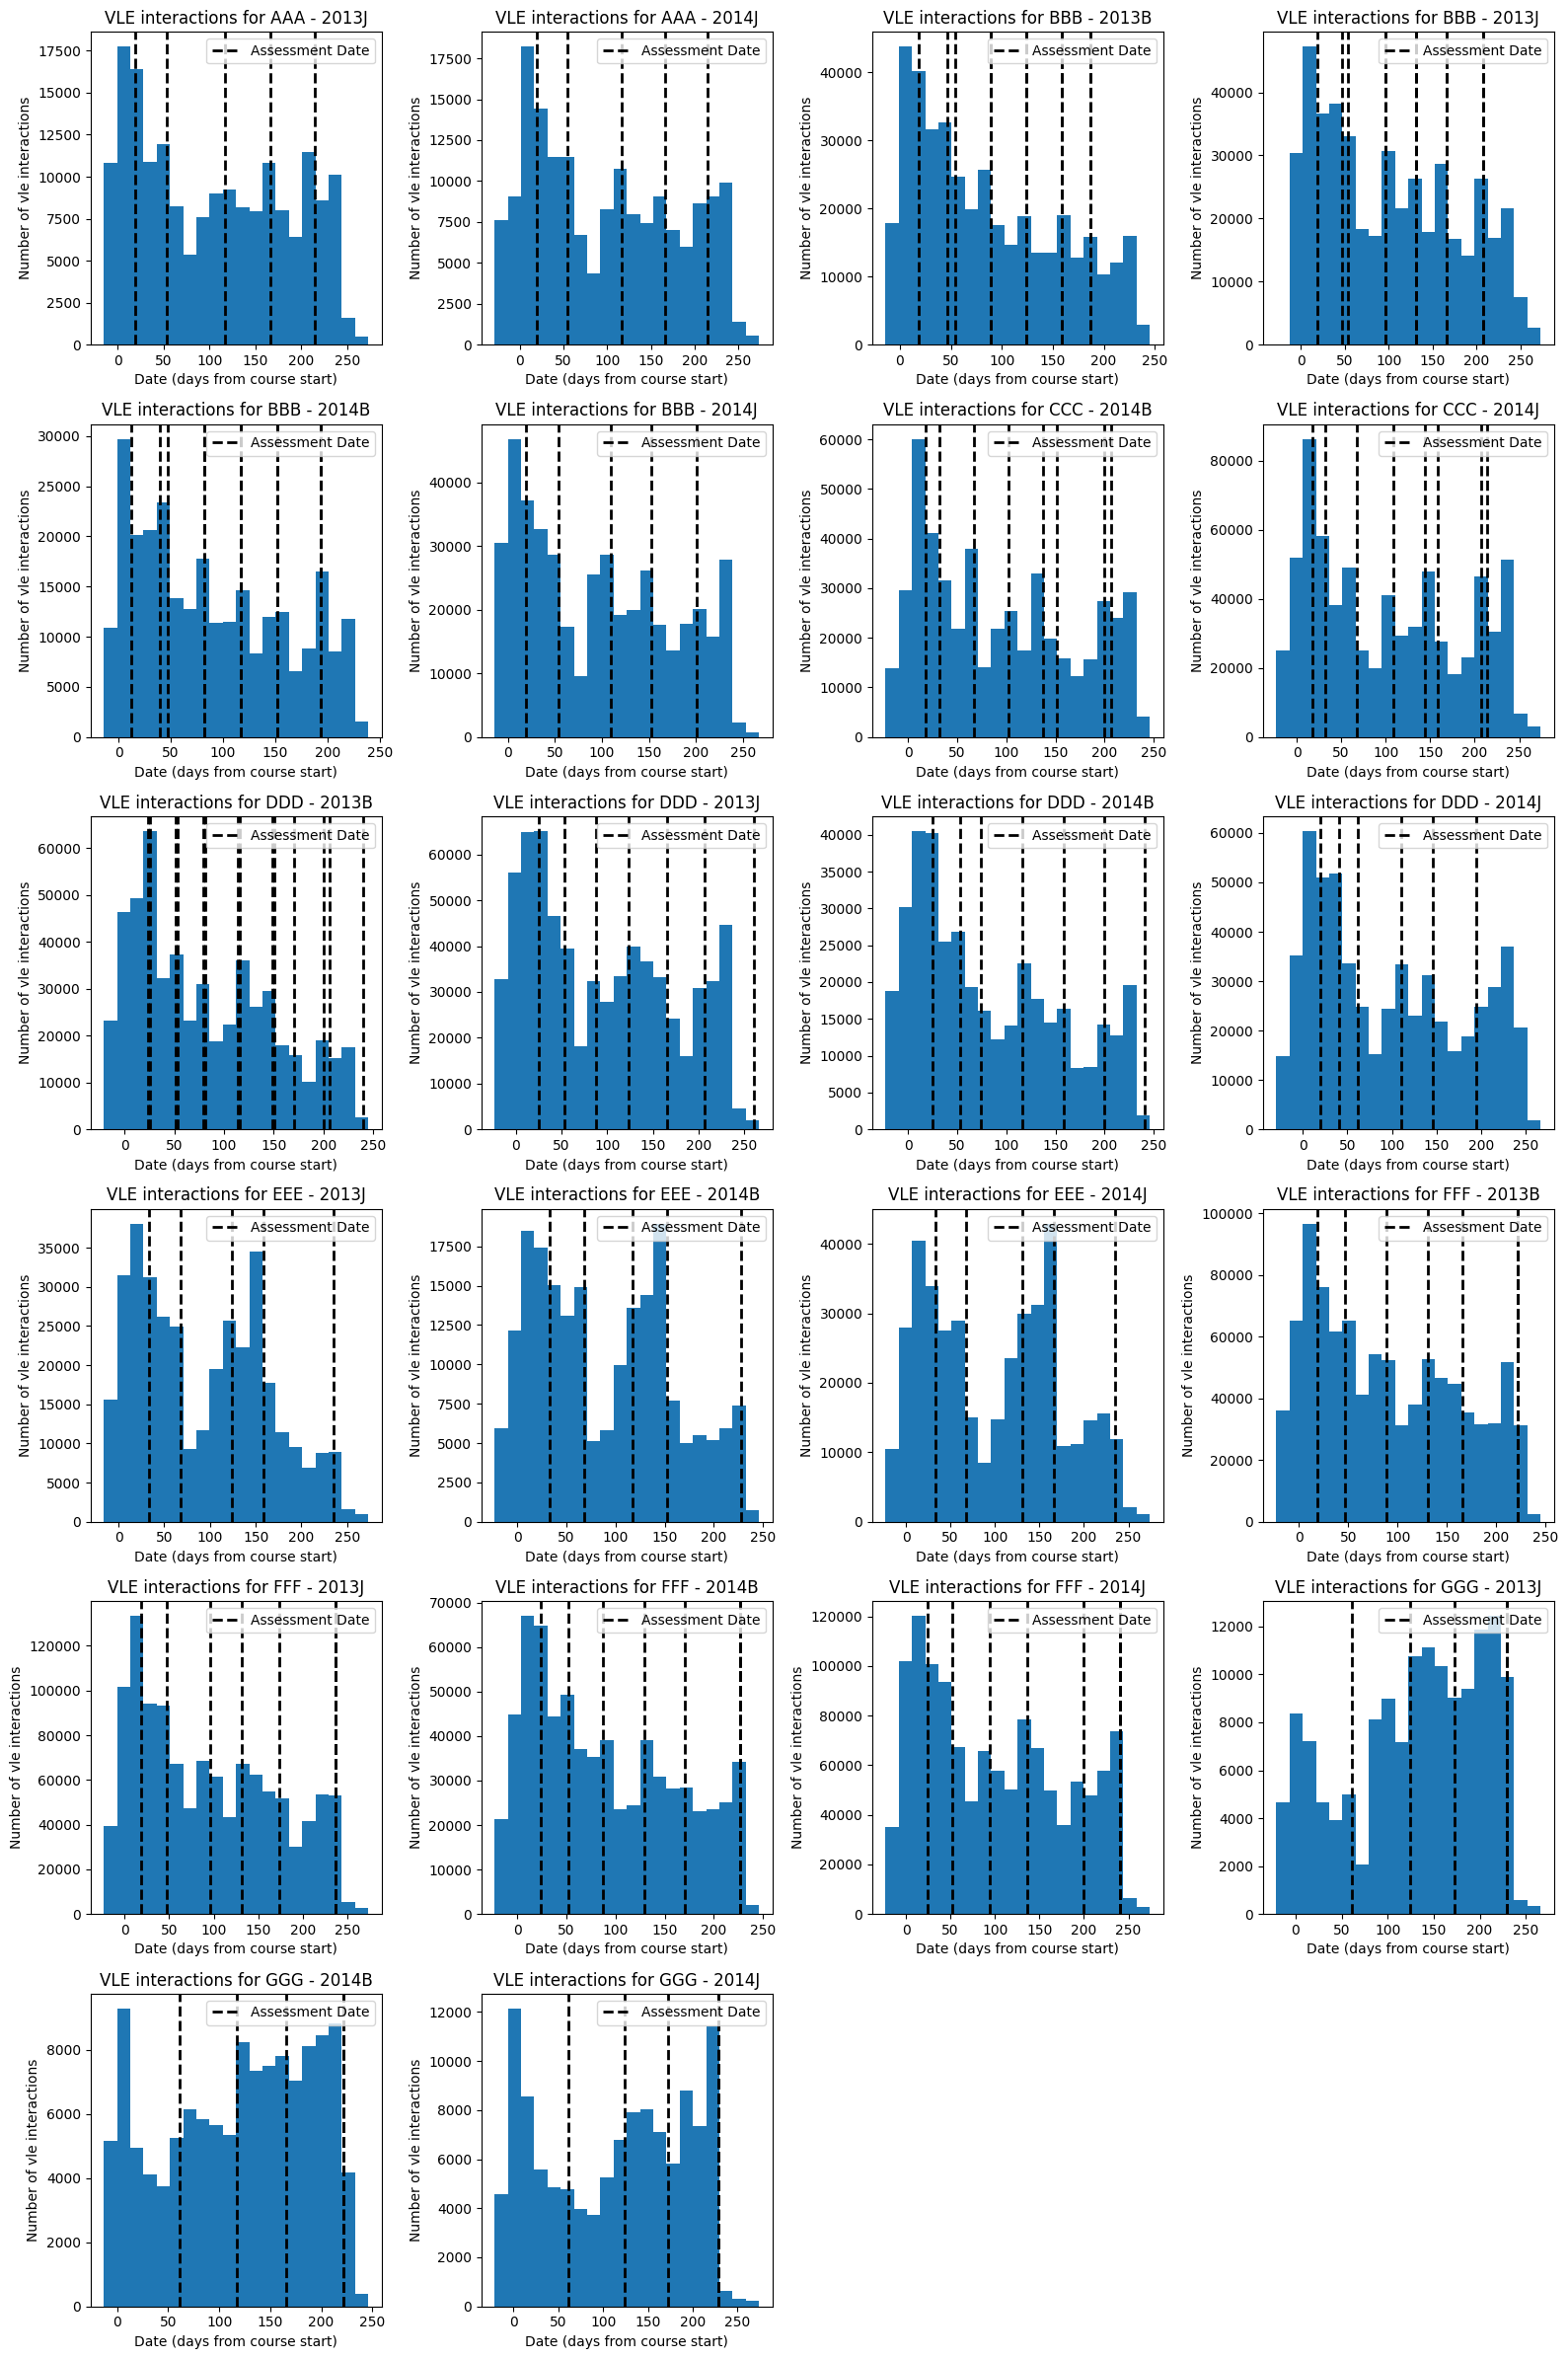

In [155]:
# Check if interactions are related to assessments for all courses

# create list of unique course presentations
unique_course_presentations = df_assessments[['code_module', 'code_presentation']].drop_duplicates().reset_index()
n_plots = len(unique_course_presentations)
print(f'Creating {n_plots} plots:')

# create  subplots
plots_per_row = 4
# calculat number of rows needed
n_rows = (n_plots//plots_per_row)+1
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(4*plots_per_row, 4*n_rows))
# delete unnecessary subplots
axes = axes.flatten()
n_surplus = n_plots%plots_per_row
if n_surplus:
    for i in range(n_surplus):
        fig.delaxes(axes[-i-1])

# create chart for each unique course presentation
for i in range(len(unique_course_presentations)):
    code_module = unique_course_presentations.code_module[i]
    code_presentation = unique_course_presentations.code_presentation[i]
    print(f"Creating plot {i+1}: {code_module} - {code_presentation}")
    chart_assessment_studentinteraction(axes[i], code_module, code_presentation)

plt.tight_layout()

-> it seems vle interactions are related to assessment moments 

Text(0, 0.5, 'count of sum_click')

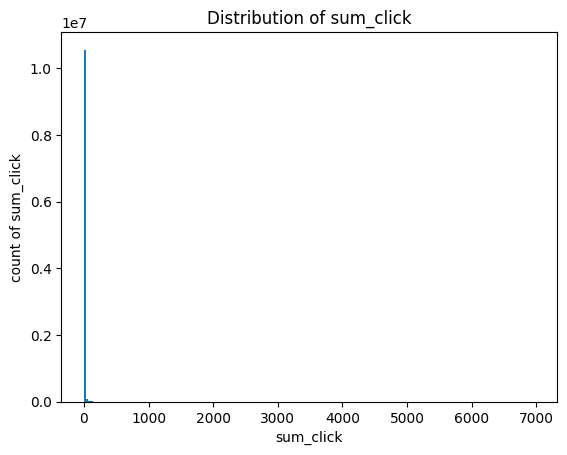

In [168]:
# look at distribution of sum_clicks
plt.hist(df_studentvle['sum_click'], bins=200)
plt.title('Distribution of sum_click')
plt.xlabel('sum_click')
plt.ylabel('count of sum_click')

sum_click has too many unique values for easy plotting. We'll take a look at what cutoff value we can use

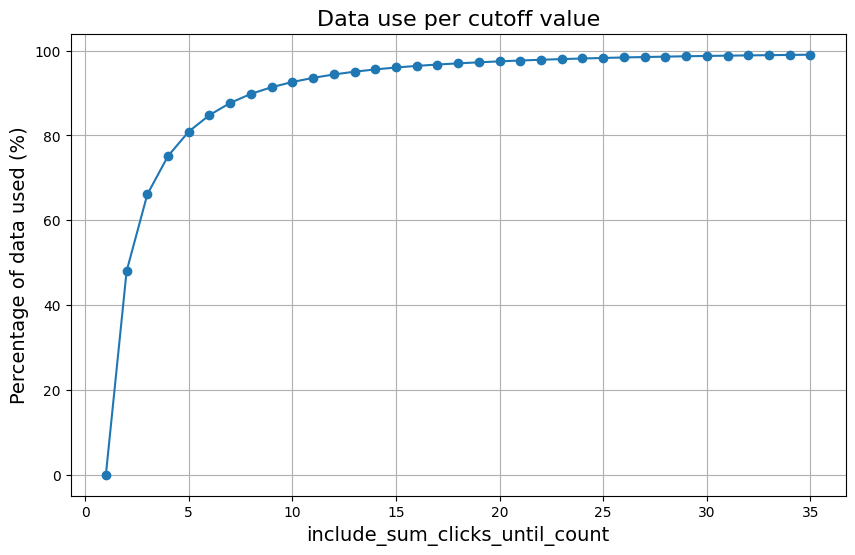

In [176]:
# Plot cutoffs and data usage 
# choose how much data you want to include
minimum_data_use = 0.99

# Initialize lists to store results
counts = []
percentage_data_used_list = []

# Iterate over different counts until enough data is used
data_used = 0
cutoff = 1

while data_used < minimum_data_use:
    counts.append(cutoff)
    data = df_studentvle['sum_click'][df_studentvle['sum_click'] < cutoff]
    data_used = (len(data) / len(df_studentvle))
    percentage_data_used = round(data_used * 100, 3)
    percentage_data_used_list.append(percentage_data_used)
    cutoff += 1

# save cutoff
cutoff = counts[-1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(counts, percentage_data_used_list, marker='o')
plt.xlabel('include_sum_clicks_until_count', fontsize=14)
plt.ylabel('Percentage of data used (%)', fontsize=14)
plt.title('Data use per cutoff value', fontsize=16)
plt.grid(True)
plt.show()

97.465% of sum_click data used in chart


Text(0, 0.5, 'Number of interactions')

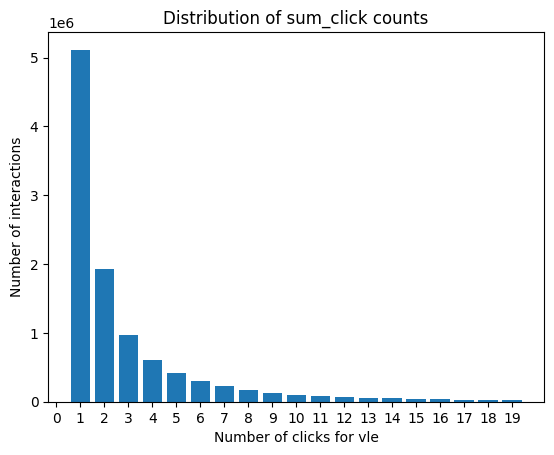

In [178]:
# look at distribution of sum_clicks with cutoff (=20)
cutoff = 20

# filter out counts of include_sum_clicks_until_count and higher
data = df_studentvle['sum_click'][df_studentvle['sum_click']<cutoff]
# calculate how much of the data is used by excluding values of include_sum_clicks_until_count and higher
percentage_data_used = round((len(data)/len(df_studentvle))*100, 3)
print(f'{percentage_data_used}% of sum_click data used in chart')

value_counts = data.value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.xticks(range(cutoff))
plt.title('Distribution of sum_click counts')
plt.xlabel('Number of clicks for vle')
plt.ylabel('Number of interactions')

In [180]:
# merge activity_type into df_studentvle
df_studentvle = df_studentvle.merge(df_vle[['id_site','activity_type']],
                    on=['id_site'],
                    how='left')


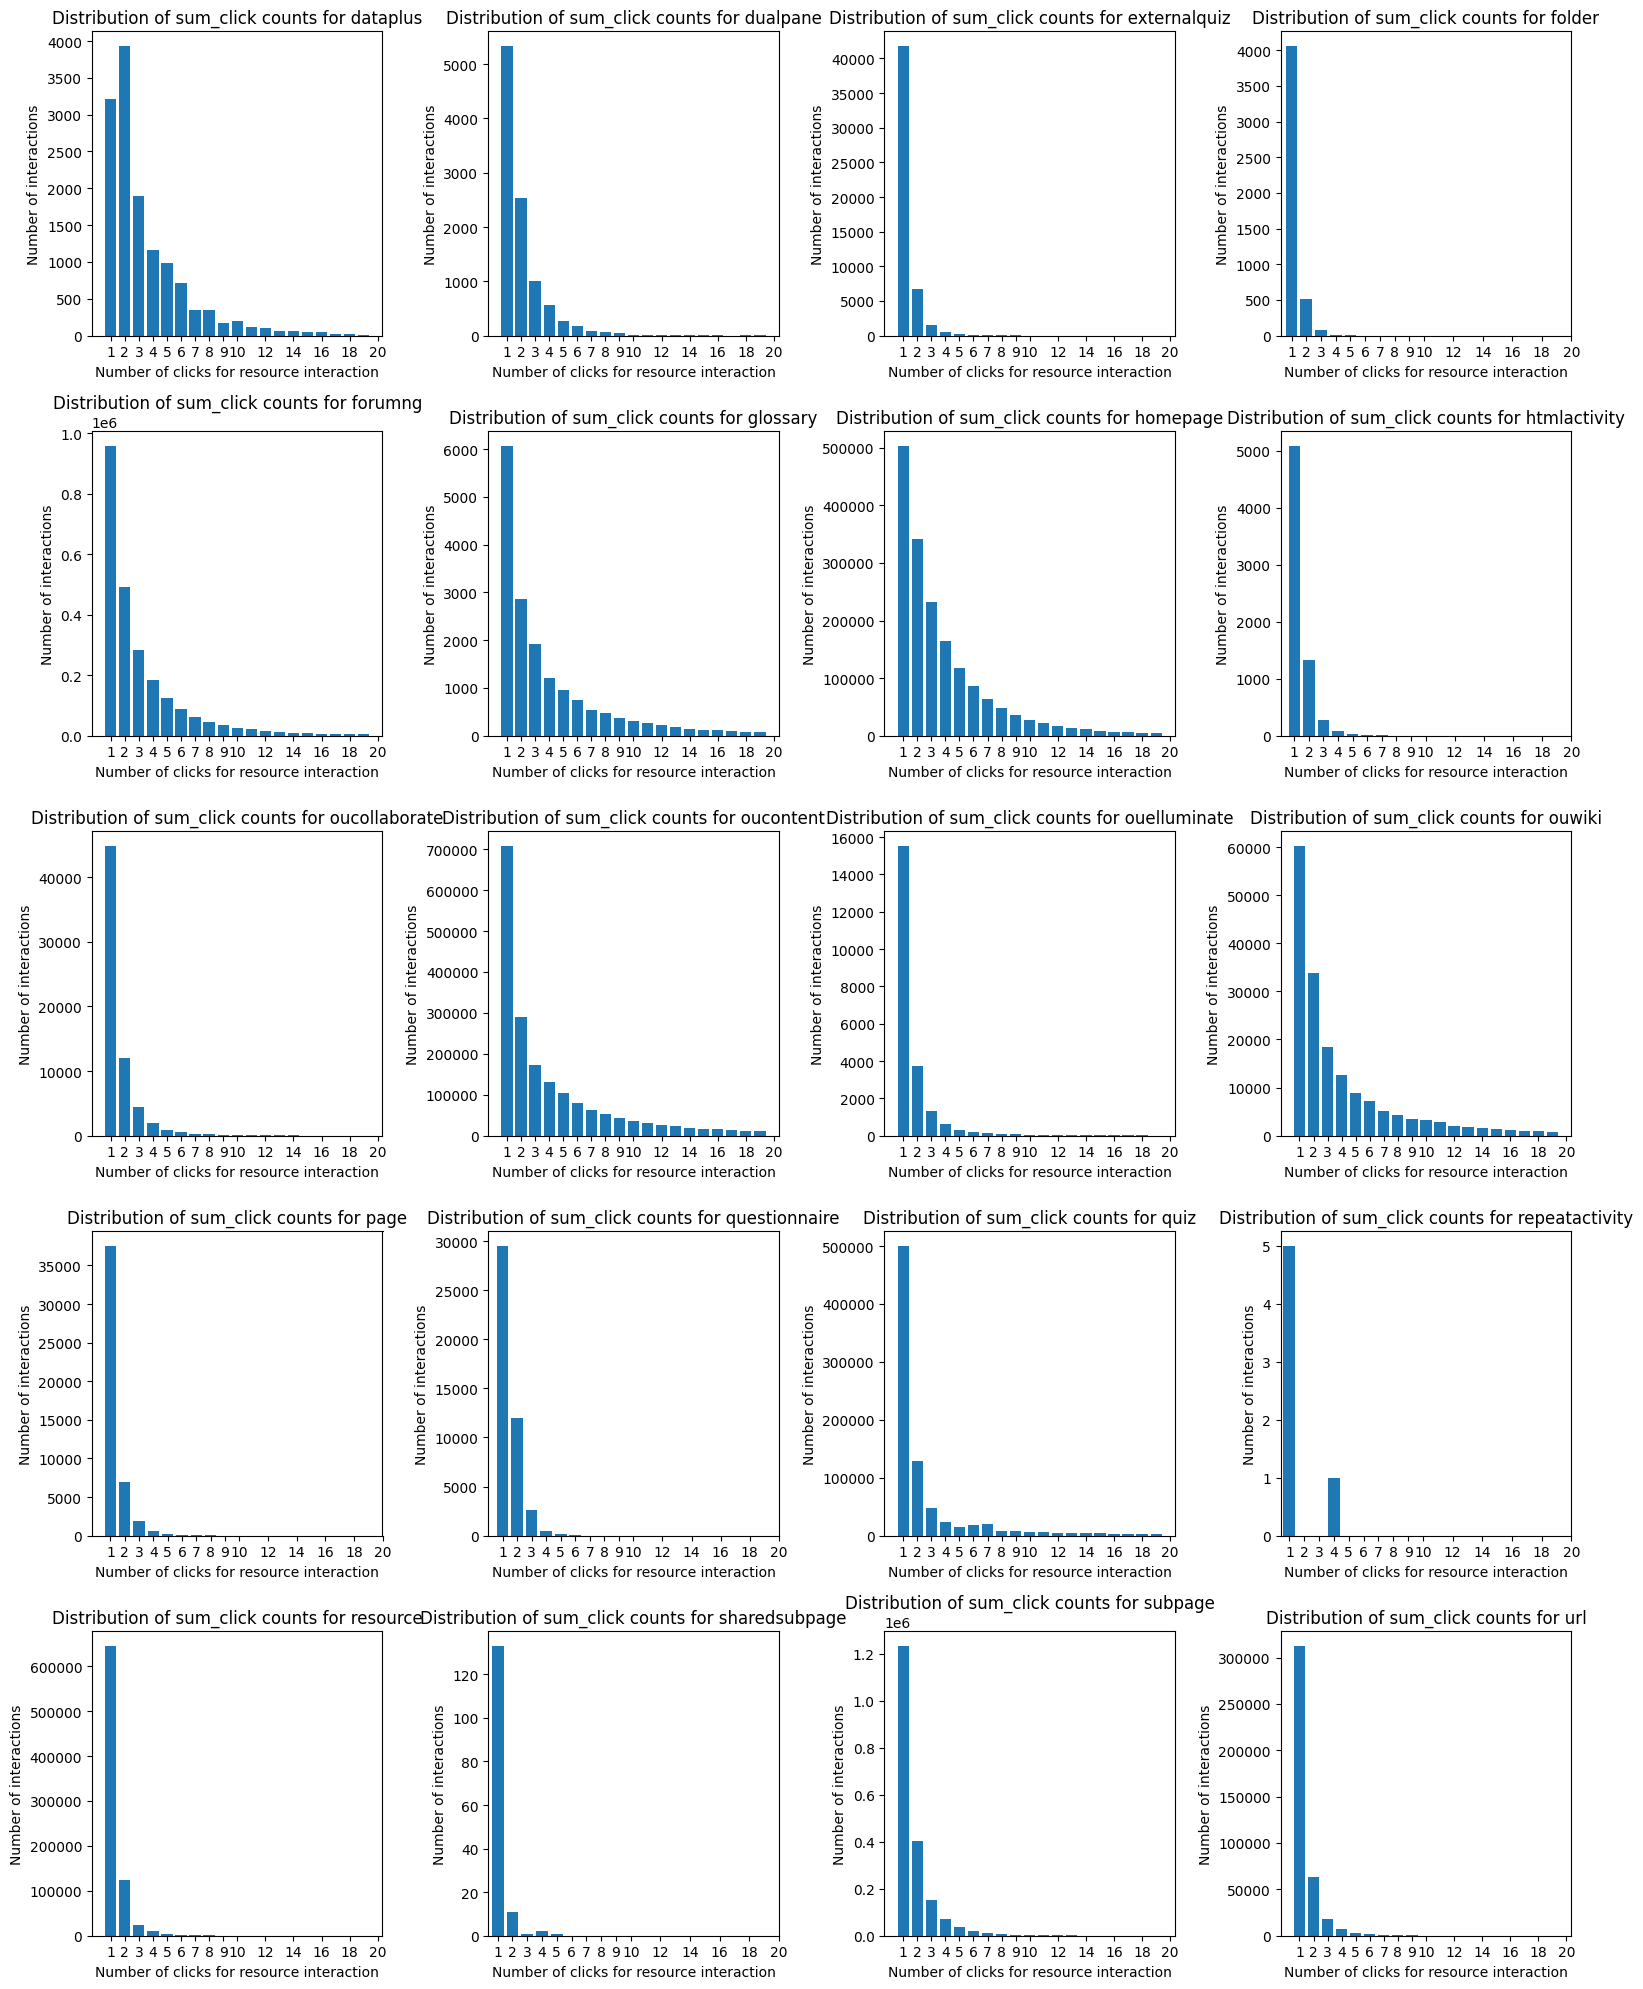

In [181]:
# check distribution of sum_click for different activity_types
plots_per_row = 4

# calculate subplot dimensions 
n_plots = df_studentvle.activity_type.nunique()
n_rows = (n_plots//plots_per_row)
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(4*plots_per_row, 4*n_rows))
# delete unnecessary subplots
axes = axes.flatten()
n_surplus = n_plots%plots_per_row
if n_surplus:
    for i in range(n_surplus):
        fig.delaxes(axes[-i-1])

# Group the data by 'activity_type' and create a plot for each group
for i, (activity_type, group_data) in enumerate(df_studentvle.groupby('activity_type')):
    
    ax = axes[i]
    data = group_data['sum_click'][group_data['sum_click'] < cutoff]
    value_counts = data.value_counts().sort_index()

    ax.bar(value_counts.index, value_counts.values)
    ax.set_xticks(list(range(1, 11)) + list(range(12, cutoff + 1, 2)))

    ax.set_title(f'Distribution of sum_click counts for {activity_type}')
    ax.set_xlabel('Number of clicks for resource interaction')
    ax.set_ylabel('Number of interactions')

plt.tight_layout()

-> distribution of sum_click counts is quite different for different activity_types

# writing to csv files

Due to our denormalisation, we don't need 
- df_courses (all info in df_assessments)
- df_studentregistration (all info in df_studentinfo)

In [183]:
# rename df_studentassessment date column to due_date_assessment
df_studentassessment.rename(columns={'date': 'due_date_assessment'}, inplace=True)

In [184]:
# write relevant dfs to csv files
folder_name = 'denormalised_data'


filenames_to_dfs = {
    'assessment': df_assessments,
    'studentassessment': df_studentassessment,
    'studentinfo': df_studentinfo,
    'studentvle': df_studentvle,
    'vle': df_vle
}

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

for df_name, df in filenames_to_dfs.items():
    file_name = f'{df_name}.csv'
    file_path = os.path.join(folder_name, file_name)
    df.to_csv(file_path, index=False)